In [4]:
utf8::utf8_print('\U0001f6a7 work in progress \U0001f6a7')

[1] "🚧​ work in progress 🚧​"


# Comparison between variant annotation databases

Created: **31/07/18**  
Last modified: **14/08/18**

**Goal:** This notebook is directly linked to [`doc/biblio/variant_annotation_databases.md`](https://github.com/ElsaB/impact-annotator/blob/master/doc/biblio/variant_annotation_databases.md) which compares and describes different variant annotation databases. The aim of this notebook is to compare the annotations of some of the databases studied in the markdown with OncoKB annotations.

We will study different databases available online and compare them with OncoKB:
* [CanDL](https://github.com/ElsaB/impact-annotator/blob/master/doc/biblio/variant_annotation_databases.md#candl)
* [DoCM](https://github.com/ElsaB/impact-annotator/blob/master/doc/biblio/variant_annotation_databases.md#docm)
* [Precision Medicine Knowledgebase](https://github.com/ElsaB/impact-annotator/blob/master/doc/biblio/variant_annotation_databases.md#precision-medicine-knowledgebase) (couldn't finish)
* [CIViC](https://github.com/ElsaB/impact-annotator/blob/master/doc/biblio/variant_annotation_databases.md#civic)
* [Cancer Genome Interpreter](https://github.com/ElsaB/impact-annotator/blob/master/doc/biblio/variant_annotation_databases.md#cancer-genome-interpreter)

This notebook is divided in 7 parts:

* **1. CanDL**
* **2. DoCM**
* **3. Precision Medicine Knowledgebase**
* **4. CIViC**
* **5. Cancer Genome Interpreter**
* **6. Study the IMPACT variants repartition accross the databases**
* **7. Study shared genes**

The process to study the database `another_database` will always be the same and each section (from 1 to 5)
will be divided in the following subsections:
1. Get the raw dataframe `another_database`
2. Create keys to join the dataframe `impact` and `another_database`. Two verifications to do:
    1. every key in `another_database` has unique values
    2. every key in `impact` has an analoguous key in `another_database`
3. Compare `another_database` annotations with OncoKB annotations

The work presented here is "approximative" as we used a special tool to link our `impact` dataset with OncoKB (oncokb-annotator) while we're just trying here to link the other databases by hand, not always going into the most details to get every mutations.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CanDL" data-toc-modified-id="CanDL-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>CanDL</a></span><ul class="toc-item"><li><span><a href="#Get-the-raw-data" data-toc-modified-id="Get-the-raw-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get the raw data</a></span></li><li><span><a href="#Create-keys-to-join-the-two-dataframes-and-extract-the-features" data-toc-modified-id="Create-keys-to-join-the-two-dataframes-and-extract-the-features-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Create keys to join the two dataframes and extract the features</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#DoCM" data-toc-modified-id="DoCM-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DoCM</a></span><ul class="toc-item"><li><span><a href="#Get-the-raw-data" data-toc-modified-id="Get-the-raw-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Get the raw data</a></span></li><li><span><a href="#Create-keys-to-join-the-two-dataframes-and-extract-the-features" data-toc-modified-id="Create-keys-to-join-the-two-dataframes-and-extract-the-features-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Create keys to join the two dataframes and extract the features</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Precision-Medicine-Knowledgebase" data-toc-modified-id="Precision-Medicine-Knowledgebase-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Precision Medicine Knowledgebase</a></span><ul class="toc-item"><li><span><a href="#Get-the-raw-data" data-toc-modified-id="Get-the-raw-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Get the raw data</a></span></li></ul></li><li><span><a href="#CIViC" data-toc-modified-id="CIViC-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>CIViC</a></span><ul class="toc-item"><li><span><a href="#Create-keys-to-join-the-two-dataframes-and-extract-the-features" data-toc-modified-id="Create-keys-to-join-the-two-dataframes-and-extract-the-features-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Create keys to join the two dataframes and extract the features</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Cancer-Genome-Interpreter" data-toc-modified-id="Cancer-Genome-Interpreter-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Cancer Genome Interpreter</a></span><ul class="toc-item"><li><span><a href="#Get-the-raw-data" data-toc-modified-id="Get-the-raw-data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Get the raw data</a></span></li><li><span><a href="#Create-keys-to-join-the-two-dataframes-and-extract-the-features" data-toc-modified-id="Create-keys-to-join-the-two-dataframes-and-extract-the-features-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Create keys to join the two dataframes and extract the features</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Study-the-IMPACT-variants-repartition-accross-the-databases" data-toc-modified-id="Study-the-IMPACT-variants-repartition-accross-the-databases-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Study the IMPACT variants repartition accross the databases</a></span><ul class="toc-item"><li><span><a href="#At-the-row-level" data-toc-modified-id="At-the-row-level-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>At the row level</a></span></li><li><span><a href="#At-the-key-level" data-toc-modified-id="At-the-key-level-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>At the key level</a></span></li><li><span><a href="#Mutations-not-in-OncoKB" data-toc-modified-id="Mutations-not-in-OncoKB-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Mutations not in OncoKB</a></span></li></ul></li><li><span><a href="#Study-shared-genes" data-toc-modified-id="Study-shared-genes-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Study shared genes</a></span><ul class="toc-item"><li><span><a href="#Correct-Hugo-symbols" data-toc-modified-id="Correct-Hugo-symbols-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Correct Hugo symbols</a></span></li><li><span><a href="#Study-genes-sharing" data-toc-modified-id="Study-genes-sharing-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Study genes sharing</a></span></li></ul></li></ul></div>

***

In [5]:
source("../../../src/utils/custom_tools.R")
setup_environment("../../../src/utils")

In [6]:
impact <- read.table("../../../data/cleaned_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)
impact <- add_features("../../../data/", impact, oncokb = TRUE)

We will only work with the curated mutations:

In [7]:
impact <- impact[impact$confidence_class %in% c("AUTO_OK", "MANUAL_OK"),] # keep only the somatic mutations

In [8]:
impact$is_in_oncokb <- "no"
impact$is_in_oncokb[impact$oncogenic %in% c("Oncogenic", "Likely Oncogenic", "Predicted Oncogenic")] <- "yes"

## CanDL

### Get the raw data

Data downloaded from https://candl.osu.edu/download/full, 09/08/18 version.

In [9]:
candl <- read.table("../../../data/other_databases/candl-results-20180809100701.csv",
                    sep = ",", stringsAsFactors = FALSE, header = TRUE, fill = TRUE, quote = "")

In [10]:
nrow(candl)
length(unique(candl$Gene))
colnames(candl)

[1] 2087

[1] 82

[1] "ID"                "Gene"              "Normal.AA"        
 [4] "Peptide.Position"  "Mutation.AA"       "Chromosome"       
 [7] "DNA.Position"      "Codon"             "Transcript"       
[10] "Gene.Strand"       "RNA.Position"      "Exon"             
[13] "Mutation.Codon"    "Cancer.Type"       "Level.of.Evidence"
[16] "PMIDs"

In [11]:
head(candl)

ID,Gene,Normal.AA,Peptide.Position,Mutation.AA,Chromosome,DNA.Position,Codon,Transcript,Gene.Strand,RNA.Position,Exon,Mutation.Codon,Cancer.Type,Level.of.Evidence,PMIDs
1,ABL1,T,212,R,9,133738234,ACG,uc004bzw.3,+,634,4,AGG,Chronic Myelocytic Leukemia,3,20519627
2,ABL1,T,212,R,9,133738235,ACG,uc004bzw.3,+,635,4,AGG,Chronic Myelocytic Leukemia,3,20519627
3,ABL1,T,212,R,9,133738236,ACG,uc004bzw.3,+,636,4,AGG,Chronic Myelocytic Leukemia,3,20519627
4,ABL1,G,250,E,9,133738348,GGG,uc004bzw.3,+,748,4,GAG,Chronic Myelocytic Leukemia,1,23190221
5,ABL1,G,250,E,9,133738349,GGG,uc004bzw.3,+,749,4,GAG,Chronic Myelocytic Leukemia,1,23190221
6,ABL1,G,250,E,9,133738350,GGG,uc004bzw.3,+,750,4,GAG,Chronic Myelocytic Leukemia,1,23190221


### Create keys to join the two dataframes and extract the features

We will join the database using the following keys: 
* `Hugo_Symbol`.`HGVSp_Short` for `impact`
* `Gene`.p.`Normal.AA` `Peptide.Position` `Mutation.AA` for `candl`

In [12]:
impact$candl_key <- paste0(impact$Hugo_Symbol, '.', impact$HGVSp_Short)
head(impact$candl_key)

[1] "TP53.p.T256P"   "PIK3R3.p.I298M" "ATR.p.R2431M"   "PDGFRA.p.L465M"
[5] "FBXW7."         "FBXW7.p.G61*"

In [13]:
candl$join_key <- paste0(candl$Gene, '.p.', candl$Normal.AA, candl$Peptide.Position, candl$Mutation.AA)
head(candl$join_key)

[1] "ABL1.p.T212R" "ABL1.p.T212R" "ABL1.p.T212R" "ABL1.p.G250E" "ABL1.p.G250E"
[6] "ABL1.p.G250E"

**Verification 1** The `join_key` are not unique:

In [14]:
length(unique(candl$join_key))
nrow(candl)

[1] 365

[1] 2087

In [15]:
# make them unique
candl <- unique(candl[, c("Gene", "Normal.AA", "Peptide.Position", "Mutation.AA", "Chromosome", "join_key")])

length(unique(candl$join_key))
nrow(candl)

[1] 365

[1] 365

**Verification 2** not every impact `candl_key` has an analoguous `join_key` in `candl`.

In [16]:
impact$is_in_candl <- "no"
impact$is_in_candl[impact$candl_key %in% candl$join_key] <- "yes"

### Results


    no    yes 
178222   8876 


       Inconclusive      Likely Neutral    Likely Oncogenic           Oncogenic 
                438                 311               45583               15907 
Predicted Oncogenic             Unknown 
               2731              122128 

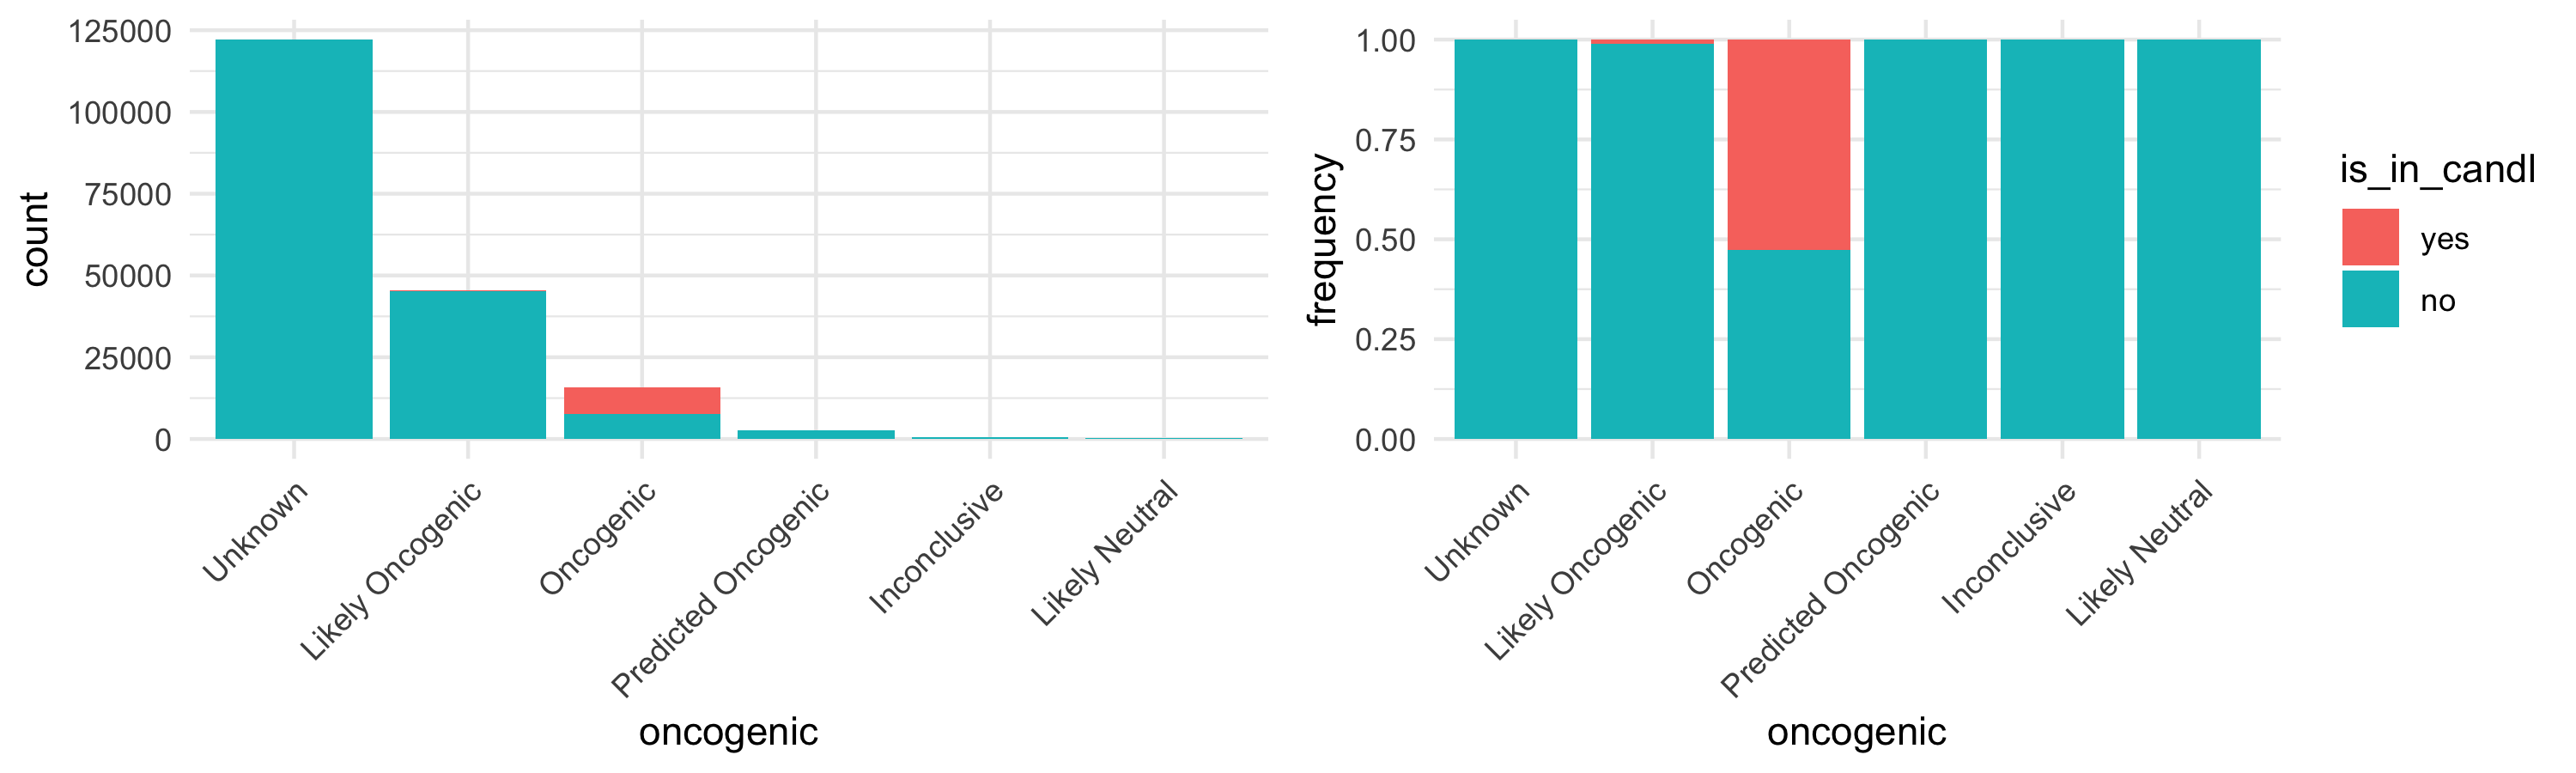

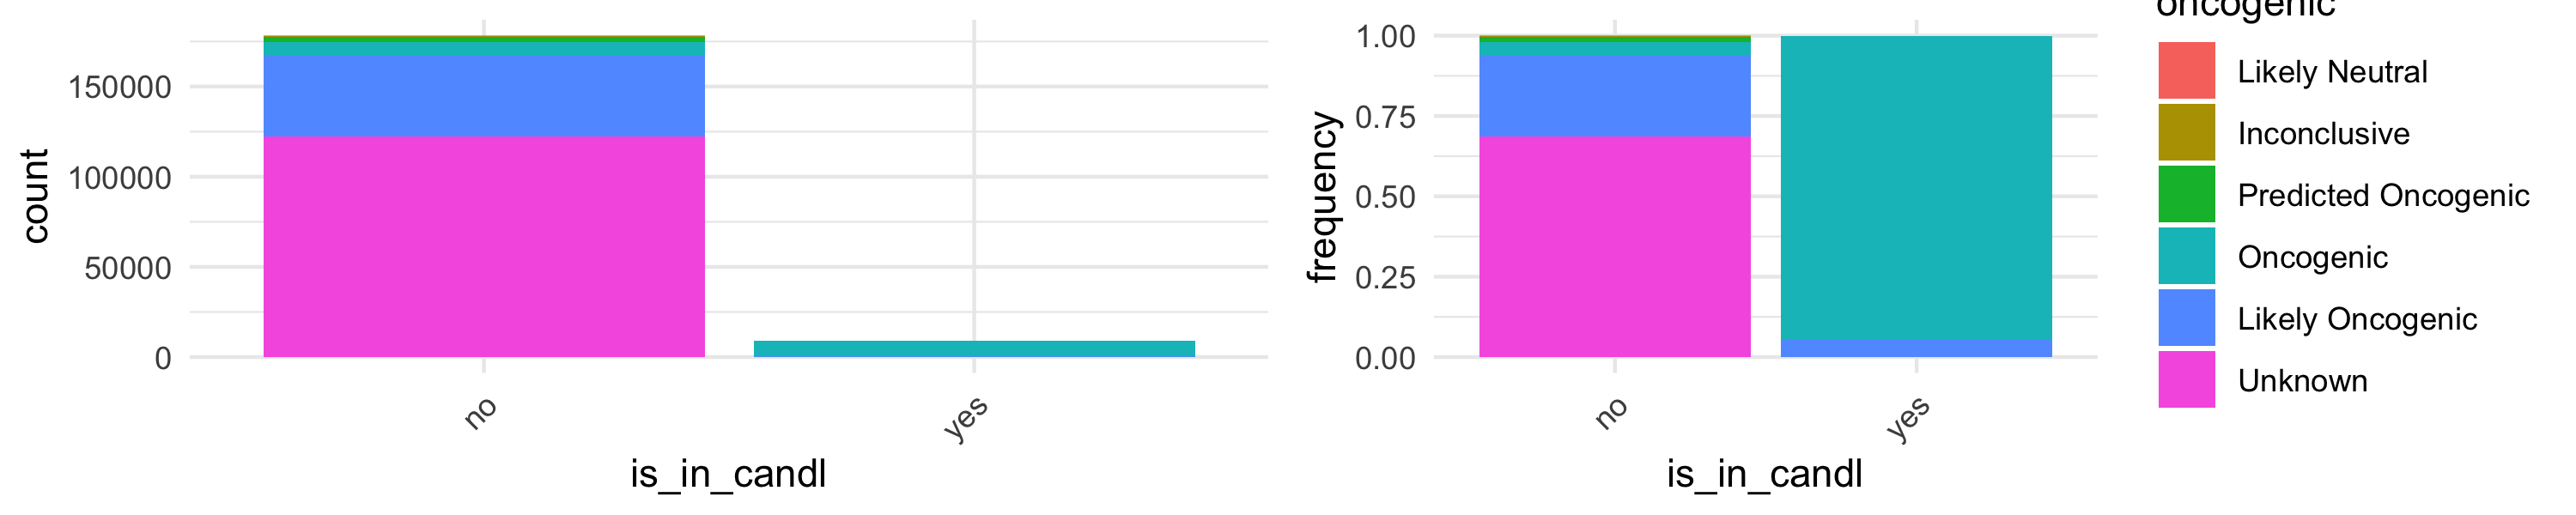

In [17]:
table(impact$is_in_candl)
table(impact$oncogenic)
plot_contingency_table_as_histograms(impact, "oncogenic"  , "is_in_candl", 10, 3)
plot_contingency_table_as_histograms(impact, "is_in_candl", "oncogenic", 10, 2)

Putative drivers not found in OncoKB:

In [22]:
# number of rows
nrow(impact[impact$is_in_candl == "yes" & impact$is_in_oncokb == "no",])

# number of distinct mutations
length(unique(impact$mut_key[impact$is_in_candl == "yes" & impact$is_in_oncokb == "no"]))

[1] 10

[1] 4

## DoCM

### Get the raw data

Data downloaded from http://www.docm.info/api/v1/variants.tsv?versions=3.2, version 3.2 (13/08/17).

In [33]:
docm <- read.table("../../../data/other_databases/DoCM_variants.tsv",
                   sep = "\t", stringsAsFactors = FALSE, header = TRUE, fill = TRUE, quote = "")

In [34]:
nrow(docm)
length(unique(docm$gene))
colnames(docm)

[1] 1364

[1] 132

[1] "hgvs"              "chromosome"        "start"            
 [4] "stop"              "read"              "variant"          
 [7] "reference_version" "gene"              "mutation_type"    
[10] "amino_acid"        "diseases"          "pubmed_sources"

In [35]:
interesting_columns <- c(
"hgvs",
"chromosome",
"start",
"stop",
"read",
"variant",
"reference_version",
"gene",
"mutation_type",
"amino_acid")

head(docm[, interesting_columns], 10)

hgvs,chromosome,start,stop,read,variant,reference_version,gene,mutation_type,amino_acid
ENST00000361445:c.7514G>C,1,11169361,11169361,C,G,GRCh37,MTOR,missense,p.R2505P
ENST00000361445:c.7500T>G,1,11169375,11169375,A,C,GRCh37,MTOR,missense,p.I2500M
ENST00000361445:c.7498A>T,1,11169377,11169377,T,A,GRCh37,MTOR,missense,p.I2500F
ENST00000361445:c.7255G>A,1,11174420,11174420,C,T,GRCh37,MTOR,missense,p.E2419K
ENST00000361445:c.6667C>A,1,11182179,11182179,G,T,GRCh37,MTOR,missense,p.Q2223K
ENST00000361445:c.6644C>A,1,11184573,11184573,G,T,GRCh37,MTOR,missense,p.S2215Y
ENST00000361445:c.6644C>T,1,11184573,11184573,G,A,GRCh37,MTOR,missense,p.S2215F
ENST00000361445:c.6643T>A,1,11184574,11184574,A,T,GRCh37,MTOR,missense,p.S2215T
ENST00000361445:c.6637C>T,1,11184580,11184580,G,A,GRCh37,MTOR,missense,p.P2213S
ENST00000361445:c.6324C>A,1,11187094,11187094,G,T,GRCh37,MTOR,missense,p.F2108L


### Create keys to join the two dataframes and extract the features

We will join the database using the following keys: 
* `mut_key` for `impact`
* `chromosome`\_`start`\_`read`_`variant` for `docm`

In [36]:
docm$join_key <- paste(docm$chromosome, docm$start, docm$read, docm$variant, sep = "_")
head(docm$join_key)

[1] "1_11169361_C_G" "1_11169375_A_C" "1_11169377_T_A" "1_11174420_C_T"
[5] "1_11182179_G_T" "1_11184573_G_T"

**Verification 1** The `join_key` are not unique:

In [37]:
length(unique(docm$join_key))
nrow(docm)

[1] 1284

[1] 1364

In [38]:
# make them unique
docm <- unique(docm[, c("chromosome", "start", "stop", "read", "variant", "reference_version", "gene",
                        "mutation_type", "join_key")])

length(unique(docm$join_key))
nrow(docm)

[1] 1284

[1] 1284

**Verification 2** not every impact `mut_key` has an analoguous `join_key` in `docm`.

In [39]:
impact$is_in_docm <- "no"
impact$is_in_docm[impact$mut_key %in% docm$join_key] <- "yes"

### Results


    no    yes 
167313  19785 


       Inconclusive      Likely Neutral    Likely Oncogenic           Oncogenic 
                438                 311               45583               15907 
Predicted Oncogenic             Unknown 
               2731              122128 

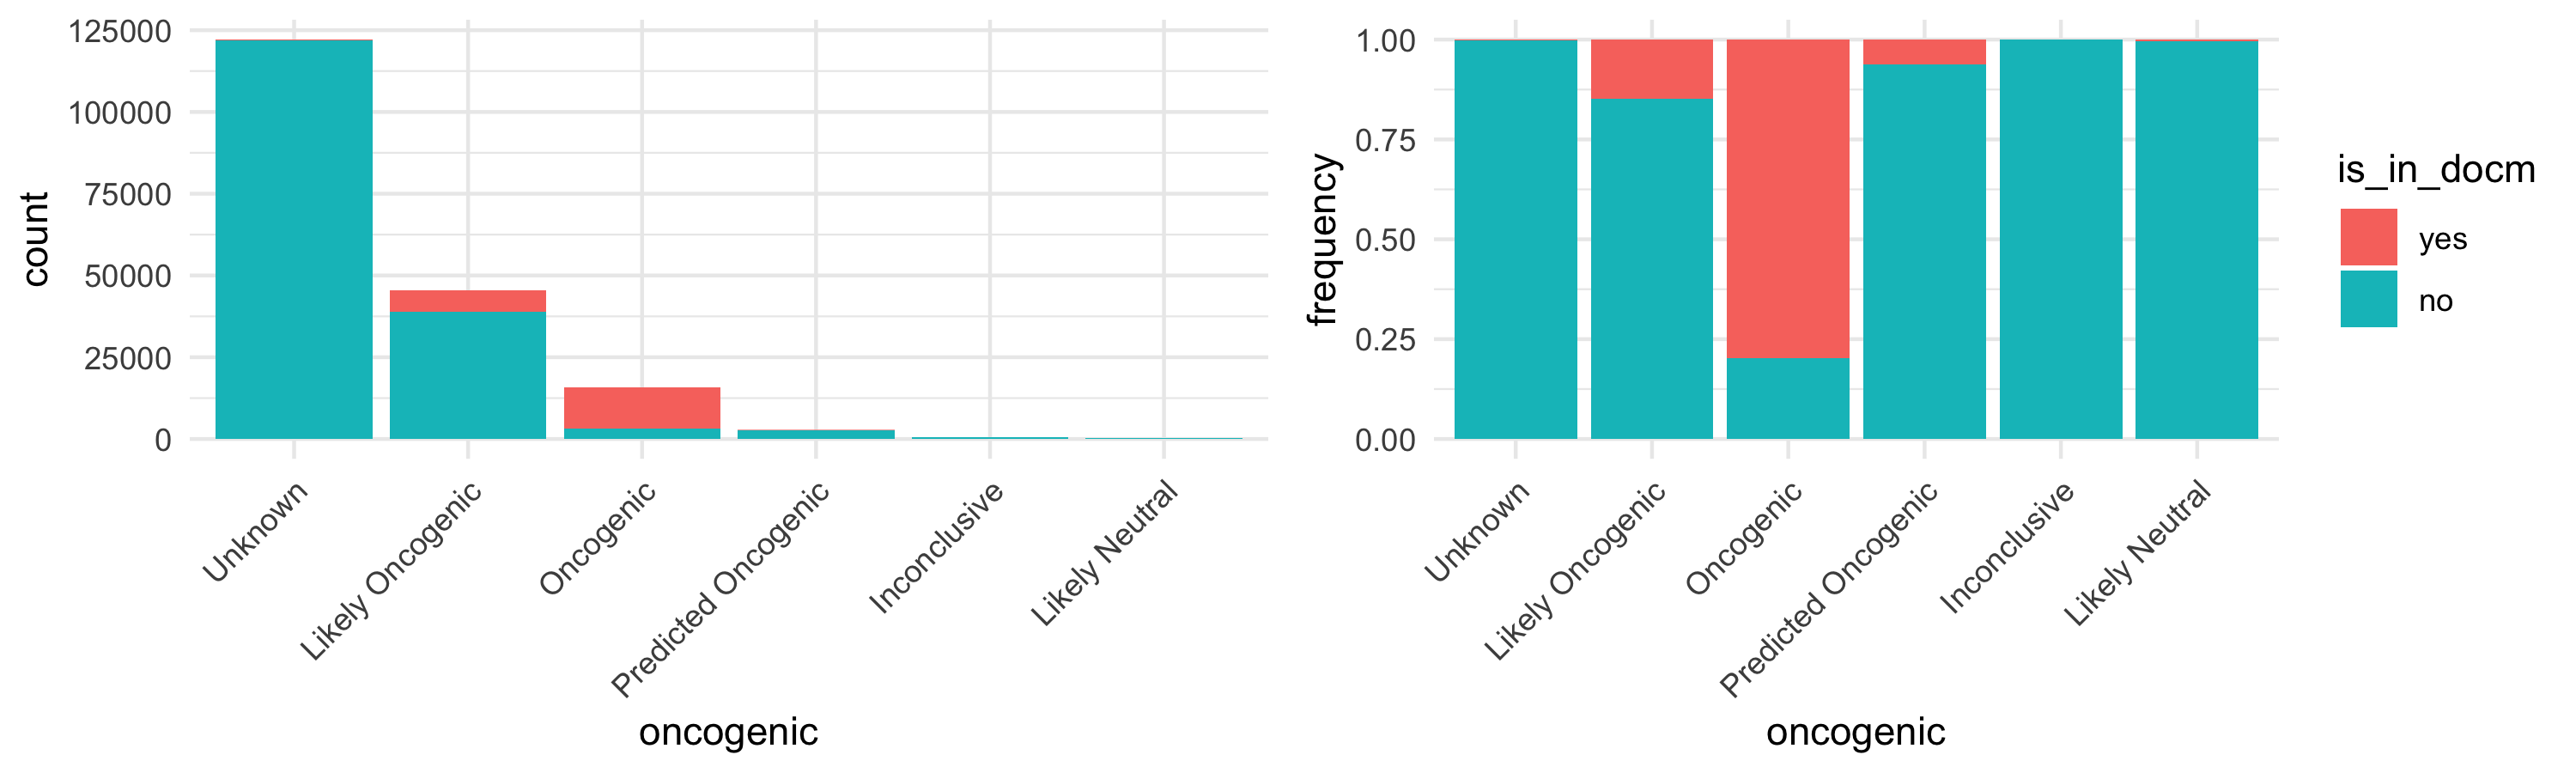

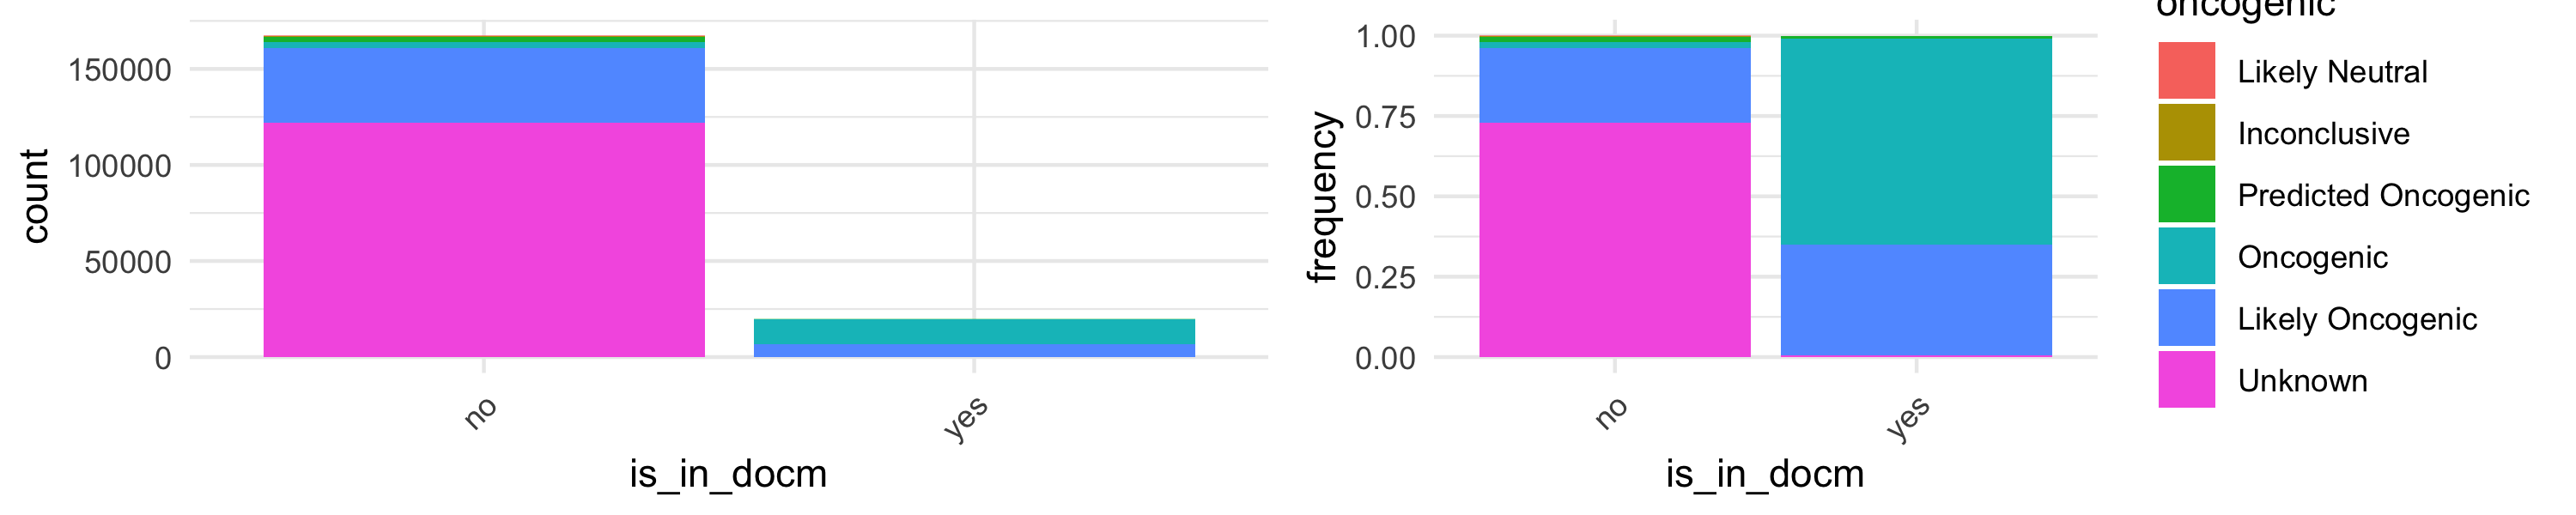

In [40]:
table(impact$is_in_docm)
table(impact$oncogenic)
plot_contingency_table_as_histograms(impact, "oncogenic"  , "is_in_docm", 10, 3)
plot_contingency_table_as_histograms(impact, "is_in_docm", "oncogenic", 10, 2)

Putative drivers not found in OncoKB:

In [41]:
# number of rows
nrow(impact[impact$is_in_docm == "yes" & impact$is_in_oncokb == "no",])

# number of distinct mutations
length(unique(impact$mut_key[impact$is_in_docm == "yes" & impact$is_in_oncokb == "no"]))

[1] 114

[1] 28

## Precision Medicine Knowledgebase

### Get the raw data

Data downloaded from https://pmkb.weill.cornell.edu under "Welcome to Precision Medicine Knowledgebase", 02/08/18 version.

In [42]:
pmk <- readxl::read_excel("../../../data/other_databases/PMK_IPM_Knowledgebase_Interpretations_Complete_20180807-1922.xlsx")

In [43]:
nrow(pmk)
length(unique(pmk$Gene))
colnames(pmk)

[1] 553

[1] 153

[1] "Gene"            "Tumor Type(s)"   "Tissue Type(s)"  "Variant(s)"     
 [5] "Tier"            "Interpretations" "Citations"       "X__1"           
 [9] "X__2"            "X__3"            "X__4"            "X__5"           
[13] "X__6"            "X__7"            "X__8"            "X__9"           
[17] "X__10"           "X__11"           "X__12"           "X__13"          
[21] "X__14"           "X__15"           "X__16"           "X__17"          
[25] "X__18"           "X__19"           "X__20"

In [44]:
interesting_columns <- c(
"Gene",
"Tumor Type(s)",
"Tissue Type(s)",
"Variant(s)",
"Tier")

head(pmk[, interesting_columns], 10)

Gene,Tumor Type(s),Tissue Type(s),Variant(s),Tier
CSF3R,"Atypical Chronic Myeloid Leukemia, Chronic Neutrophilic Leukemia, Myeloproliferative Neoplasm","Blood, Bone Marrow","CSF3R T618I, CSF3R any nonsense, CSF3R any frameshift",1
MPL,"Essential Thrombocythemia, Myeloproliferative Neoplasm, Primary Myelofibrosis","Blood, Bone Marrow","MPL codon(s) 515 missense, MPL W515L, MPL W515K",1
JAK1,"Acute Myeloid Leukemia, T Lymphoblastic Leukemia/Lymphoma","Blood, Bone Marrow",NA,1
NRAS,"Acute Myeloid Leukemia, B Lymphoblastic Leukemia/Lymphoma, Chronic Myelomonocytic Leukemia, Myelodysplastic Syndrome","Blood, Bone Marrow",NA,1
NOTCH2,"Diffuse Large B Cell Lymphoma, Marginal Zone B Cell Lymphoma","Blood, Bone Marrow","NOTCH2 I2304fs, NOTCH2 exon(s) 34 frameshift",1
RIT1,"Acute Myeloid Leukemia, Chronic Myelomonocytic Leukemia, Myelodysplastic Syndrome","Blood, Bone Marrow",RIT1 M90I,1
DNMT3A,"Acute Myeloid Leukemia, Chronic Myelomonocytic Leukemia, Myelodysplastic Syndrome, Myeloproliferative Neoplasm, T Lymphoblastic Leukemia/Lymphoma","Blood, Bone Marrow",NA,1
FANCL,Myelodysplastic Syndrome,"Blood, Bone Marrow",NA,1
XPO1,Chronic Lymphocytic Leukemia,"Blood, Bone Marrow",NA,1
CXCR4,Lymphoplasmacytic Lymphoma,"Blood, Bone Marrow",NA,1


We stopped here as there is no easy way to link this database with `impact`.

## CIViC

Data downloaded from https://civicdb.org/releases under "Variant Summaries", 01/07/18 version.

In [45]:
civic <- read.table("../../../data/other_databases/CIViC_01-Jul-2018-VariantSummaries.tsv",
                    sep = "\t", stringsAsFactors = FALSE, header = TRUE, fill = TRUE, quote = "")

In [46]:
nrow(civic)
length(unique(civic$gene))
colnames(civic)

[1] 1885

[1] 353

[1] "variant_id"                 "variant_civic_url"         
 [3] "gene"                       "entrez_id"                 
 [5] "variant"                    "summary"                   
 [7] "variant_groups"             "chromosome"                
 [9] "start"                      "stop"                      
[11] "reference_bases"            "variant_bases"             
[13] "representative_transcript"  "ensembl_version"           
[15] "reference_build"            "chromosome2"               
[17] "start2"                     "stop2"                     
[19] "representative_transcript2" "variant_types"             
[21] "hgvs_expressions"           "last_review_date"          
[23] "civic_actionability_score"

In [47]:
interesting_columns <- c(
"gene",
"variant",
"chromosome",
"start",
"stop",
"reference_bases",
"variant_bases",
"representative_transcript",
"ensembl_version",
"reference_build",
"variant_types",
"hgvs_expressions",
"civic_actionability_score")

head(civic[, interesting_columns], 10)

gene,variant,chromosome,start,stop,reference_bases,variant_bases,representative_transcript,ensembl_version,reference_build,variant_types,hgvs_expressions,civic_actionability_score
ABL1,BCR-ABL,22,23522397,23632600,,,ENST00000305877.8,75,GRCh37,transcript_fusion,,238.0
ABL1,BCR-ABL T334I,9,133748283,133748283,C,T,ENST00000372348.2,75,GRCh37,"transcript_fusion,missense_variant","NM_007313.2:c.1001C>T,NP_005148.2:p.Thr315Ile,ENST00000372348.2:c.1001C>T,NC_000009.11:g.133748283C>T",54.0
ABL1,BCR-ABL E255K,9,133738363,133738363,G,A,ENST00000318560.5,75,GRCh37,"transcript_fusion,missense_variant","NC_000009.11:g.133738363G>A,NM_005157.5:c.763G>A,NP_005148.2:p.Glu255Lys,ENST00000318560.5:c.763G>A",17.0
AKT1,E17K,14,105246551,105246551,C,T,ENST00000407796.2,75,GRCh37,missense_variant,"NC_000014.8:g.105246551C>T,NM_001014432.1:c.49G>A,NP_001014432.1:p.Glu17Lys,ENST00000407796.2:c.49G>A",32.5
ALK,EML4-ALK,2,42396490,42522656,,,ENST00000318522.5,75,GRCh37,transcript_fusion,,48.0
ALK,EML4-ALK C1156Y,2,29445258,29445258,C,T,ENST00000389048.3,75,GRCh37,"transcript_fusion,missense_variant","ENST00000389048.3:c.3467G>A,NC_000002.11:g.29445258C>T,NM_004304.4:c.3467G>A,NP_004295.2:p.Cys1156Tyr",19.0
ALK,EML4-ALK L1196M,2,29443631,29443631,G,T,ENST00000389048.3,75,GRCh37,"transcript_fusion,missense_variant","ENST00000389048.3:c.3586C>A,NC_000002.11:g.29443631G>T,NM_004304.4:c.3586C>A,NP_004295.2:p.Leu1196Met",31.0
ALK,F1174L,2,29443695,29443695,G,T,ENST00000389048.3,75,GRCh37,missense_variant,"NM_004304.4:c.3522C>A,NP_004295.2:p.Phe1174Leu,NC_000002.11:g.29443695G>T,ENST00000389048.3:c.3522C>A",33.5
ALK,R1275Q,2,29432664,29432664,C,T,ENST00000389048.3,75,GRCh37,missense_variant,"NM_004304.4:c.3824G>A,NP_004295.2:p.Arg1275Gln,NC_000002.11:g.29432664C>T,ENST00000389048.3:c.3824G>A",23.0
ARAF,S214C,X,47426121,47426121,C,G,ENST00000377045.4,75,GRCh37,missense_variant,"NC_000023.10:g.47426121C>G,NM_001654.4:c.641C>G,NP_001645.1:p.Ser214Cys,ENST00000377045.4:c.641C>G",11.0


### Create keys to join the two dataframes and extract the features

We will join the database using the following keys: 
* `mut_key` for `impact`
* `chromosome`\_`start`_`reference_bases`_`variant_bases` for `civic`

In [49]:
civic$join_key <- paste(civic$chromosome, civic$start, civic$reference_bases, civic$variant_bases, sep = "_")

# sometimes we can't find a key
civic$join_key[civic$chromosome == "" |
               civic$start == "" |
               (civic$reference_bases == "" & civic$variant_bases   == "")] <- "no_key"

head(civic$join_key)

[1] "no_key"           "9_133748283_C_T"  "9_133738363_G_A"  "14_105246551_C_T"
[5] "no_key"           "2_29445258_C_T"

In [50]:
print_count_and_proportion(civic[civic$join_key == "no_key",], civic)

# delete the rows where we couldn't find a key
civic <- civic[civic$join_key != "no_key",]

[1] "1082 over 1885 (57.40%)"

**Verification 1** The `join_key` are not unique:

In [51]:
length(unique(civic$join_key))
nrow(civic)

[1] 797

[1] 803

In [52]:
# make them unique
civic <- unique(civic[, c("gene", "chromosome", "start", "stop", "reference_bases", "variant_bases", "join_key")])

length(unique(civic$join_key))
nrow(civic)

[1] 797

[1] 797

**Verification 2** not every impact `mut_key` has an analoguous `join_key` in `civic`.

In [53]:
impact$is_in_civic <- "no"
impact$is_in_civic[impact$mut_key %in% civic$join_key] <- "yes"

### Results


    no    yes 
174423  12675 


       Inconclusive      Likely Neutral    Likely Oncogenic           Oncogenic 
                438                 311               45583               15907 
Predicted Oncogenic             Unknown 
               2731              122128 

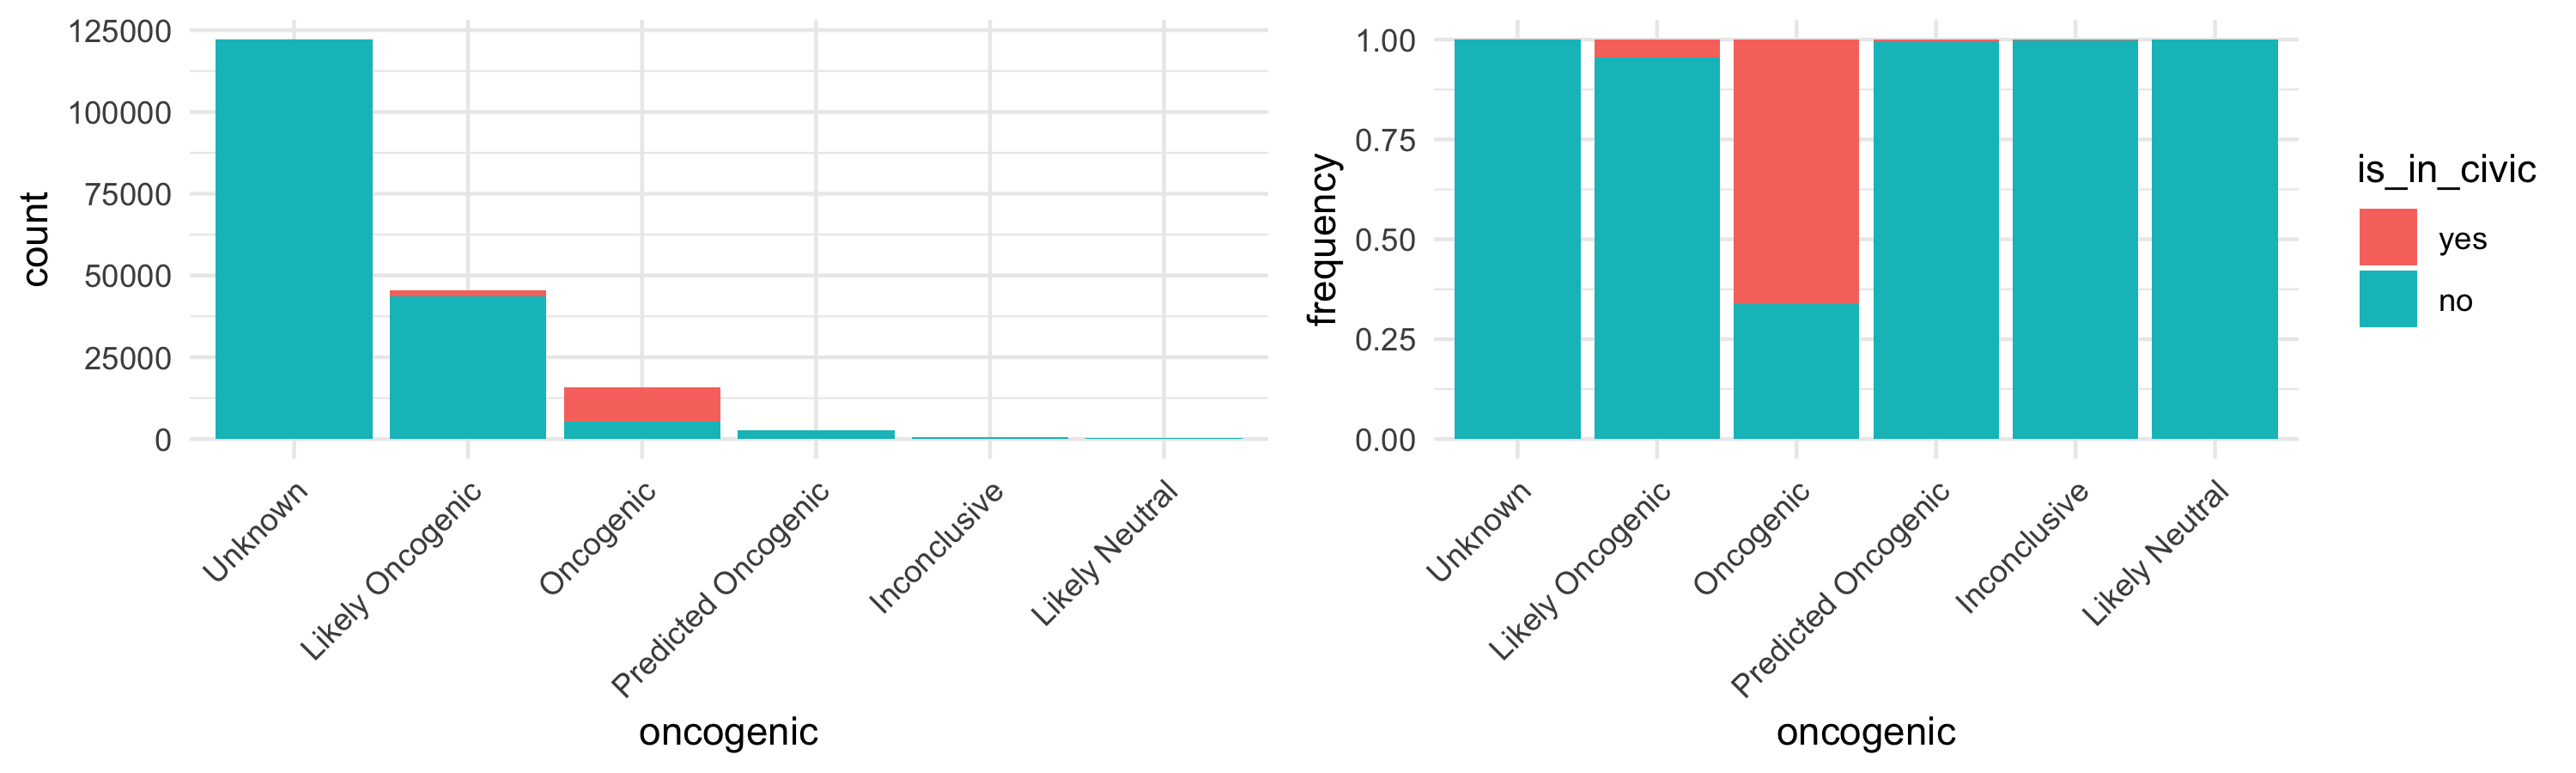

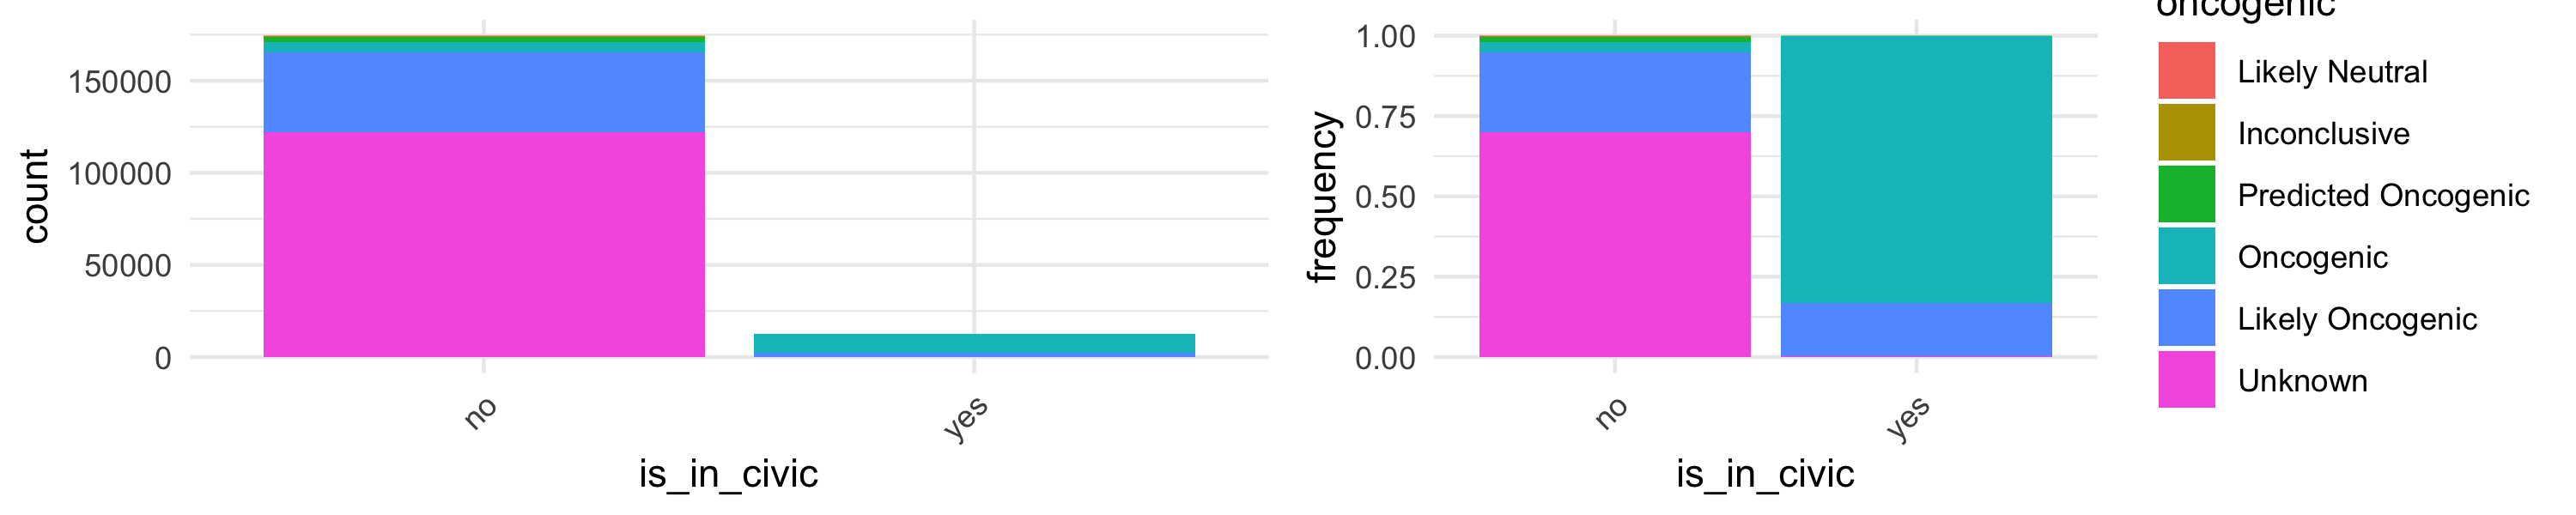

In [55]:
table(impact$is_in_civic)
table(impact$oncogenic)
plot_contingency_table_as_histograms(impact, "oncogenic"  , "is_in_civic", 10, 3)
plot_contingency_table_as_histograms(impact, "is_in_civic", "oncogenic", 10, 2)

Putative drivers not found in OncoKB:

In [56]:
# number of rows
nrow(impact[impact$is_in_civic == "yes" & impact$is_in_oncokb == "no",])

# number of distinct mutations
length(unique(impact$mut_key[impact$is_in_civic == "yes" & impact$is_in_oncokb == "no"]))

[1] 51

[1] 28

## Cancer Genome Interpreter

### Get the raw data

Data downloaded from https://www.cancergenomeinterpreter.org/mutations, 01/17/18 version.

In [57]:
cgi <- read.table("../../../data/other_databases/CGI_catalog_of_validated_oncogenic_mutations.tsv",
                  sep = "\t", stringsAsFactors = FALSE, header = TRUE, fill = TRUE)

In [58]:
nrow(cgi)
length(unique(cgi$gene))
colnames(cgi)

[1] 5601

[1] 247

[1] "gene"           "gdna"           "protein"        "transcript"    
[5] "info"           "context"        "cancer_acronym" "source"        
[9] "reference"

In [59]:
head(cgi, 10)

gene,gdna,protein,transcript,info,context,cancer_acronym,source,reference
ABCB4,chr7:g.87053221C>T,.,ENST00000265723,CSQN=SpliceDonorSNV;C2=SpliceDonorOfExon17_At_chr7:87053221;aliases=ENSP00000265723;source=Ensembl,germline,HC-PR,ClinVar,Clinvar:NM_018849.2(ABCB4):c.2211+1G>A AND Progressive familial intrahepatic cholestasis 3
ABL1,chr9:g.133738306G>A,p.E236K,ENST00000318560,CSQN=Missense;codon_pos=133738306-133738307-133738308;ref_codon_seq=GAG;aliases=ENSP00000323315;source=Ensembl,somatic,CML,DoCM,PMID:21562040
ABL1,chr9:g.133738309A>G,p.M237V,ENST00000318560,"CSQN=Missense;reference_codon=ATG;candidate_codons=GTA,GTC,GTG,GTT;candidate_mnv_variants=chr9:g.133738309_133738311delATGinsGTA,chr9:g.133738309_133738311delATGinsGTC,chr9:g.133738309_133738311delATGinsGTT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,Biomarker,PMID:21562040
ABL1,chr9:g.133738325T>C,p.I242T,ENST00000318560,"CSQN=Missense;reference_codon=ATC;candidate_codons=ACA,ACG,ACT,ACC;candidate_mnv_variants=chr9:g.133738325_133738326delTCinsCA,chr9:g.133738325_133738326delTCinsCG,chr9:g.133738325_133738326delTCinsCT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,Biomarker,PMID:21562040
ABL1,chr9:g.133738330A>G,p.M244V,ENST00000318560,"CSQN=Missense;codon_pos=133738330-133738331-133738332;ref_codon_seq=ATG;aliases=ENSP00000323315;source=Ensembl__CSQN=Missense;reference_codon=ATG;candidate_codons=GTA,GTC,GTG,GTT;candidate_mnv_variants=chr9:g.133738330_133738332delATGinsGTA,chr9:g.133738330_133738332delATGinsGTC,chr9:g.133738330_133738332delATGinsGTT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,DoCM__Biomarker__OncoKB,PMID:21562040__PMID:20367437__PMID:21895409__PMID:25157968__PMID:12399961__PMID:12576318__PMID:23676790__PMID:18223278__PMID:12623848__PMID:21888027
ABL1,chr9:g.133738340A>G,p.K247R,ENST00000318560,"CSQN=Missense;reference_codon=AAG;candidate_codons=AGG,AGA,CGA,CGC,CGG,CGT;candidate_mnv_variants=chr9:g.133738340_133738341delAGinsGA,chr9:g.133738339_133738340delAAinsCG,chr9:g.133738339_133738341delAAGinsCGA,chr9:g.133738339_133738341delAAGinsCGC,chr9:g.133738339_133738341delAAGinsCGT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,Biomarker,PMID:21562040
ABL1,chr9:g.133738342C>G,p.L248V,ENST00000318560,"CSQN=Missense;codon_pos=133738342-133738343-133738344;ref_codon_seq=CTG;aliases=ENSP00000323315;source=Ensembl__CSQN=Missense;reference_codon=CTG;candidate_codons=GTA,GTC,GTG,GTT;candidate_mnv_variants=chr9:g.133738342_133738344delCTGinsGTA,chr9:g.133738342_133738344delCTGinsGTC,chr9:g.133738342_133738344delCTGinsGTT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,DoCM__Biomarker__OncoKB,PMID:21562040__PMID:18354488__PMID:20367437__PMID:25157968__PMID:21221851__PMID:17008892__PMID:12623848
ABL1,chr9:g.133738348G>A,p.G250R,ENST00000318560,"CSQN=Missense;reference_codon=GGG;candidate_codons=AGG,AGA,CGA,CGC,CGG,CGT;candidate_snv_variants=chr9:g.133738348G>C;candidate_mnv_variants=chr9:g.133738348_133738350delGGGinsAGA,chr9:g.133738348_133738350delGGGinsCGA,chr9:g.133738348_133738350delGGGinsCGC,chr9:g.133738348_133738350delGGGinsCGT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,Biomarker,PMID:21562040
ABL1,chr9:g.133738349G>A,p.G250E,ENST00000318560,"CSQN=Missense;reference_codon=GGG;candidate_codons=GAG,GAA;candidate_mnv_variants=chr9:g.133738349_133738350delGGinsAA;aliases=ENSP00000323315;source=Ensembl__CSQN=Missense;codon_pos=133738348-133738349-133738350;ref_codon_seq=GGG;aliases=ENSP00000323315;source=Ensembl",somatic,CML,DoCM__Biomarker__OncoKB,PMID:21562040__PMID:21505103__PMID:20367437__PMID:21895409__PMID:22870928__PMID:25157968__PMID:11964322__PMID:23676790__PMID:12623848
ABL1,chr9:g.133738355A>G,p.Q252R,ENST00000318560,"CSQN=Missense;reference_codon=CAG;candidate_codons=AGG,AGA,CGA,CGC,CGG,CGT;candidate_mnv_variants=chr9:g.133738354_133738355delCAinsAG,chr9:g.133738355_133738356delAGinsGA,chr9:g.133738355_133738356delAGinsGC,chr9:g.133738355_133738356delAGinsGT,chr9:g.133738354_133738356delCAGinsAGA;aliases=ENSP

### Create keys to join the two dataframes and extract the features

We will join the database using the following keys: 
* `Hugo_Symbol`.`HGVSp_Short` for `impact`
* `gene`.`protein` for `cgi`

In [60]:
impact$cgi_key <- paste0(impact$Hugo_Symbol, '.', impact$HGVSp_Short)
head(impact$cgi_key)

[1] "TP53.p.T256P"   "PIK3R3.p.I298M" "ATR.p.R2431M"   "PDGFRA.p.L465M"
[5] "FBXW7."         "FBXW7.p.G61*"

In [61]:
cgi$join_key <- paste0(cgi$gene, '.', cgi$protein)
head(cgi$join_key)

[1] "ABCB4.."      "ABL1.p.E236K" "ABL1.p.M237V" "ABL1.p.I242T" "ABL1.p.M244V"
[6] "ABL1.p.K247R"

**Verification 1** The `join_key` are not unique:

In [62]:
length(unique(cgi$join_key))
nrow(cgi)

[1] 5232

[1] 5601

In [63]:
# make them unique
cgi <- unique(cgi[, c("gene", "protein", "join_key")])

length(unique(cgi$join_key))
nrow(cgi)

[1] 5232

[1] 5232

**Verification 2** not every impact `cgi_key` has an analoguous `join_key` in `cgi`.

In [64]:
impact$is_in_cgi <- "no"
impact$is_in_cgi[impact$cgi_key %in% cgi$join_key] <- "yes"

### Results


    no    yes 
163637  23461 


       Inconclusive      Likely Neutral    Likely Oncogenic           Oncogenic 
                438                 311               45583               15907 
Predicted Oncogenic             Unknown 
               2731              122128 

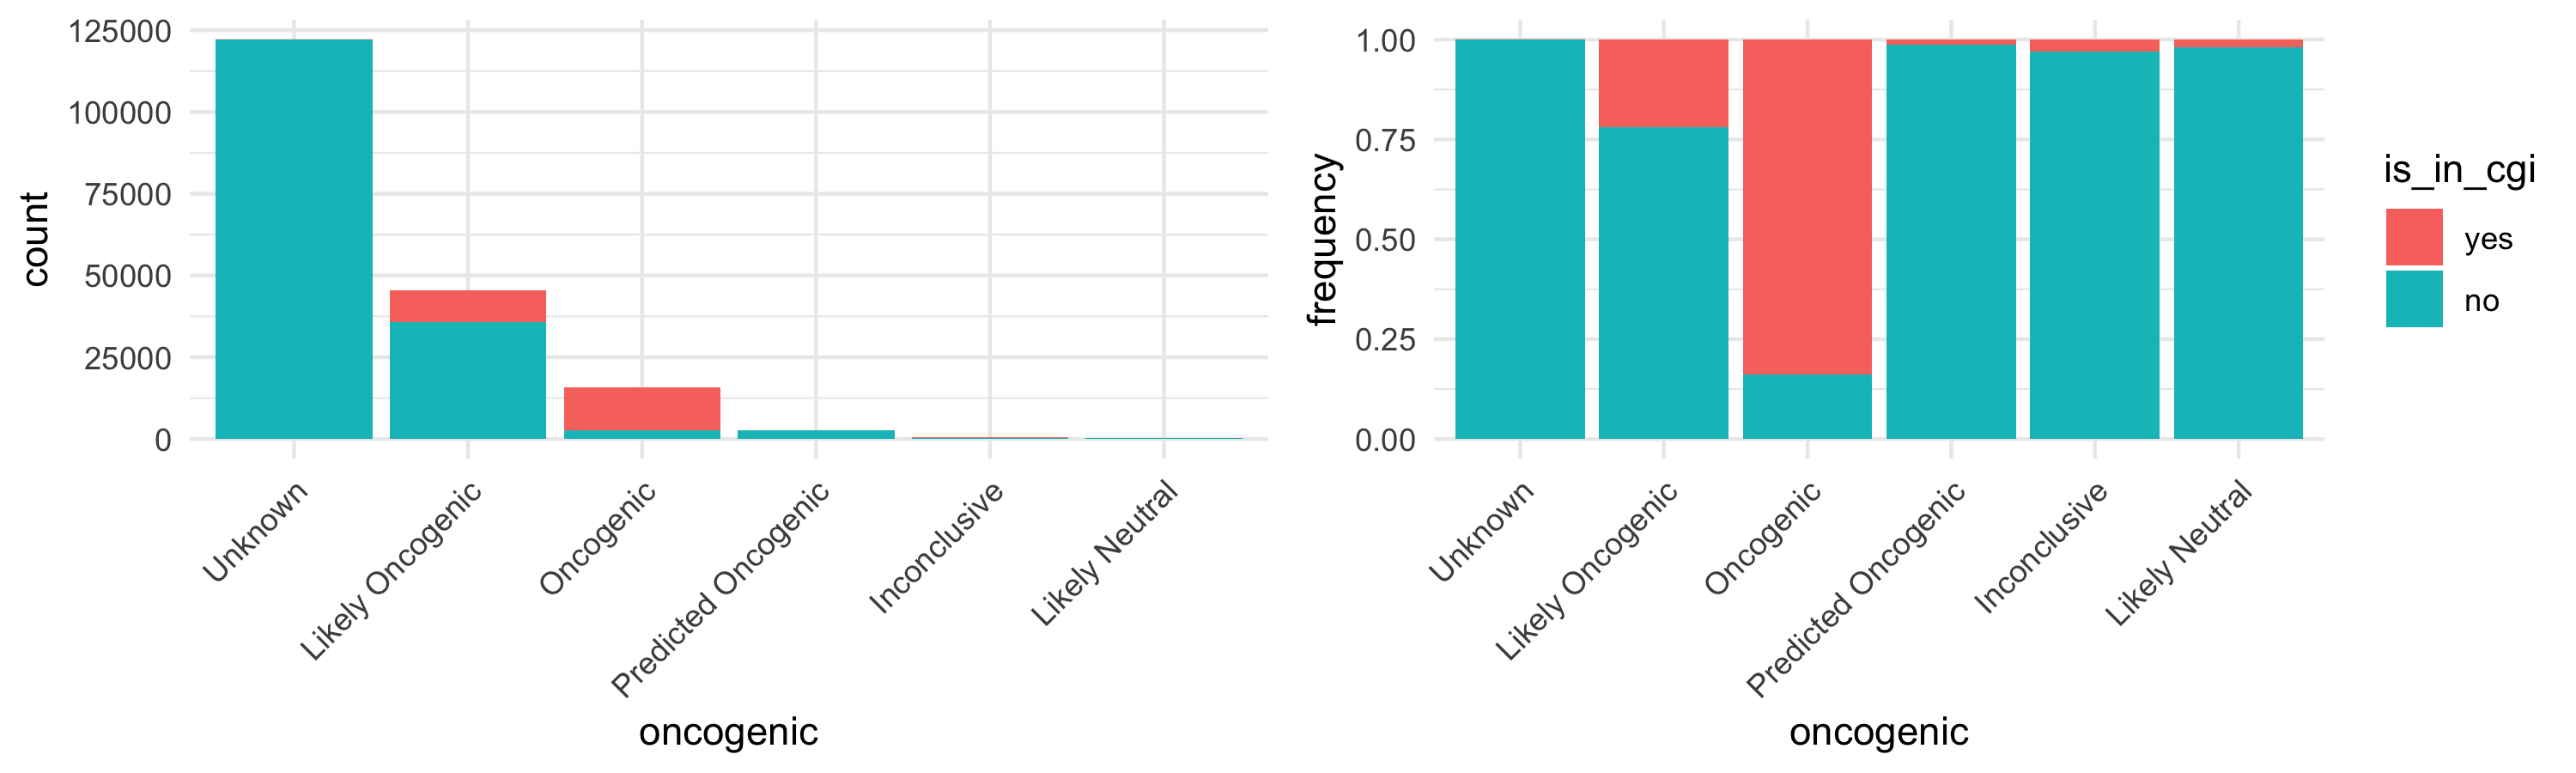

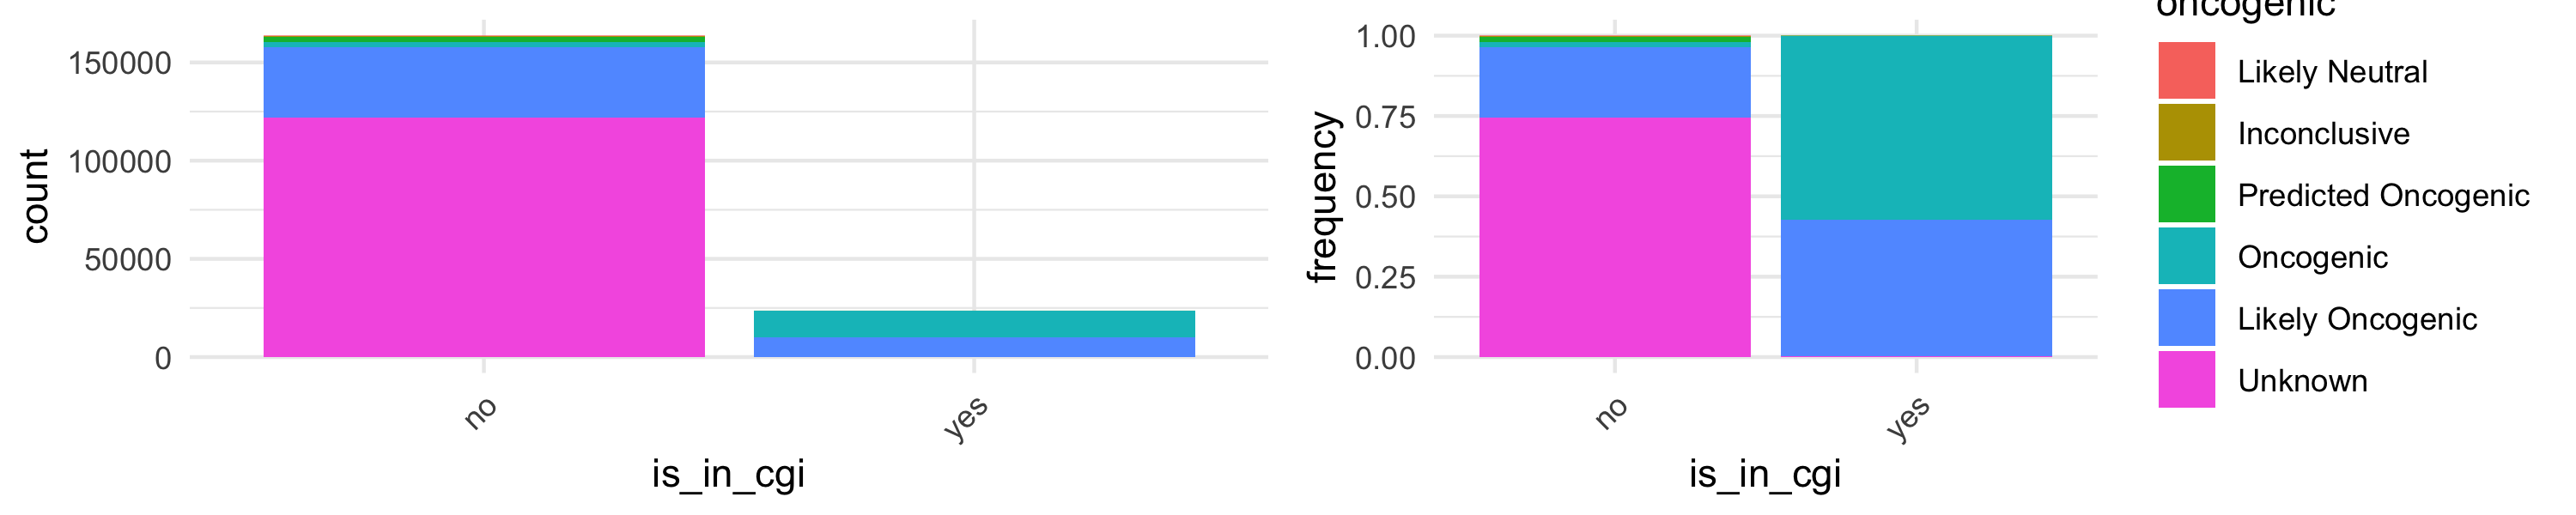

In [65]:
table(impact$is_in_cgi)
table(impact$oncogenic)
plot_contingency_table_as_histograms(impact, "oncogenic"  , "is_in_cgi", 10, 3)
plot_contingency_table_as_histograms(impact, "is_in_cgi", "oncogenic", 10, 2)

Putative drivers not found in OncoKB:

In [66]:
# number of rows
nrow(impact[impact$is_in_cgi == "yes" & impact$is_in_oncokb == "no",])

# number of distinct mutations
length(unique(impact$mut_key[impact$is_in_cgi == "yes" & impact$is_in_oncokb == "no"]))

[1] 105

[1] 57

## Study the IMPACT variants repartition accross the databases

In [67]:
oncokb_mutations <- impact[impact$is_in_oncokb == "yes",]
candl_mutations  <- impact[impact$is_in_candl  == "yes",]
docm_mutations   <- impact[impact$is_in_docm   == "yes",]
civic_mutations  <- impact[impact$is_in_civic  == "yes",]
cgi_mutations    <- impact[impact$is_in_cgi    == "yes",]

oncokb_mutations$database <- "oncokb"
candl_mutations$database  <- "candl"
docm_mutations$database   <- "docm"
civic_mutations$database  <- "civic"
cgi_mutations$database    <- "cgi"

annotated_mutations <- rbind(oncokb_mutations, candl_mutations, docm_mutations, civic_mutations, cgi_mutations)

### At the row level

In [68]:
annotated_mutations <- as.data.frame(annotated_mutations %>% group_by(mut_key) %>%
                                                             mutate(count = length(unique(database)),
                                                                    repartition = toString(unique(database))))

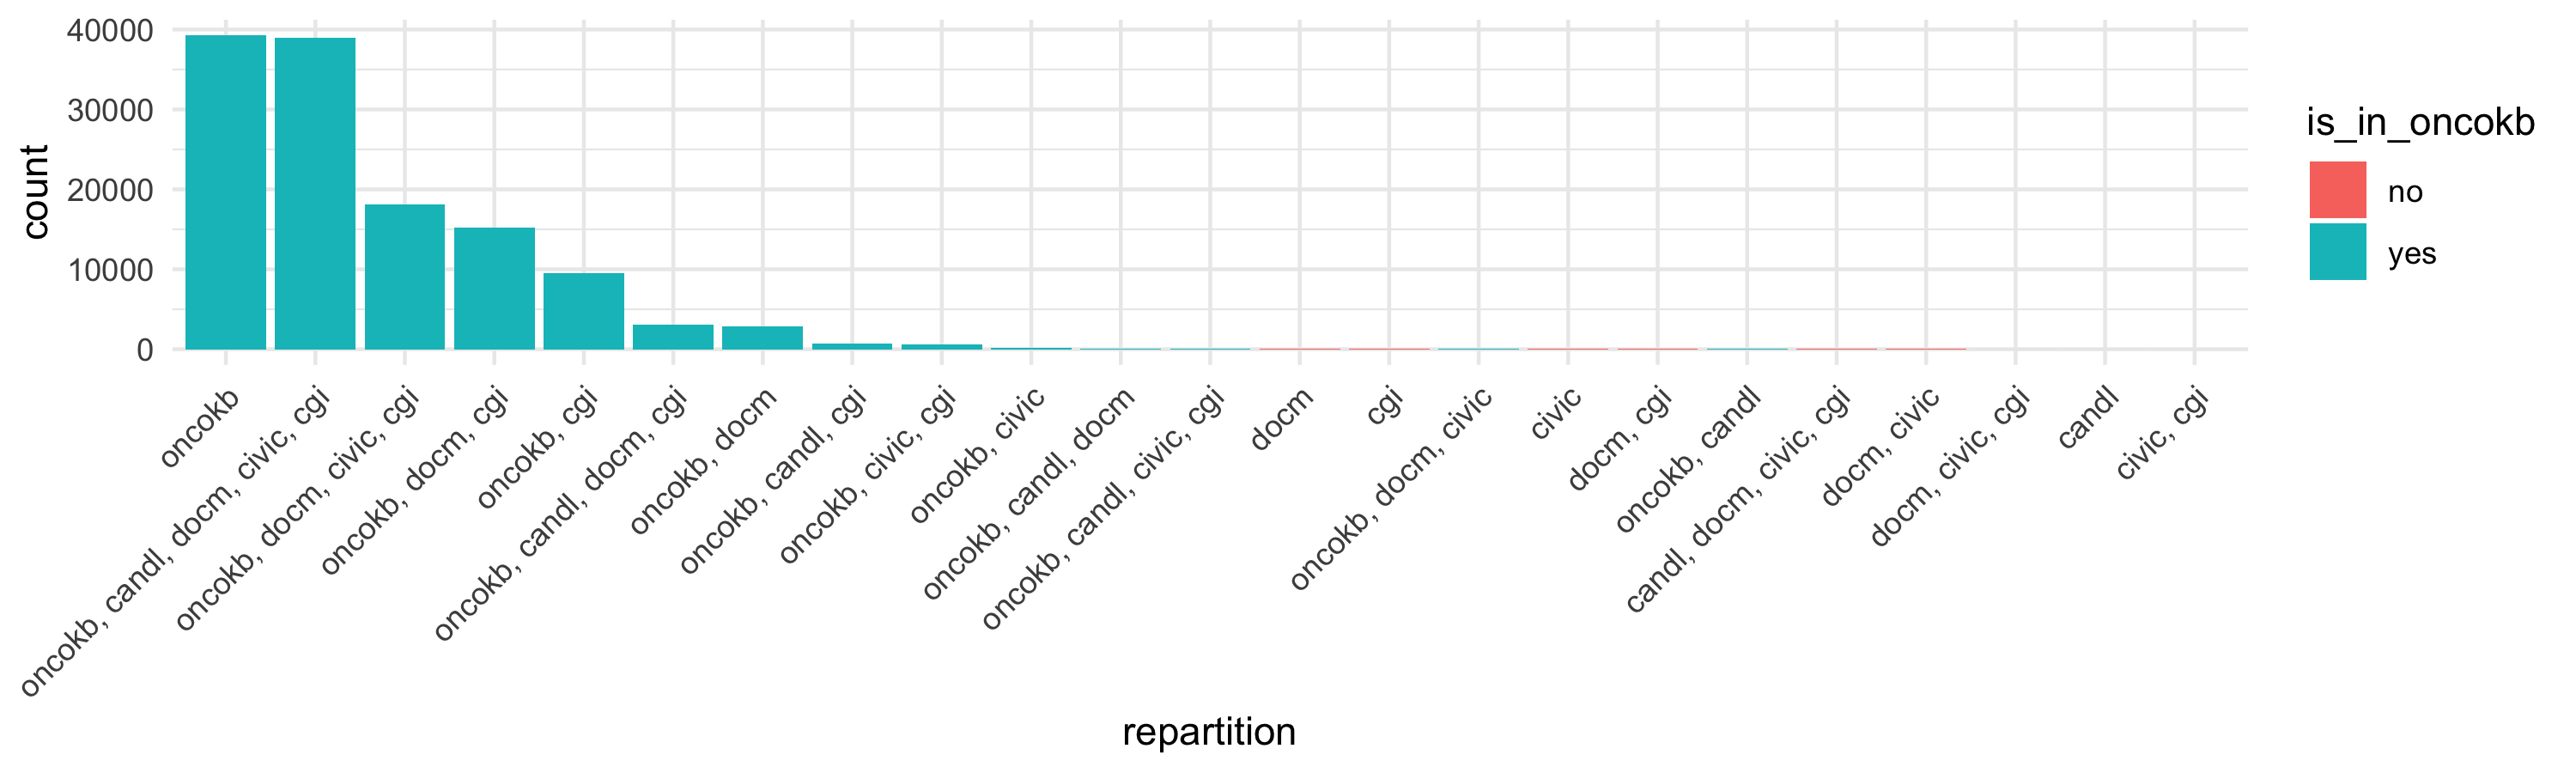

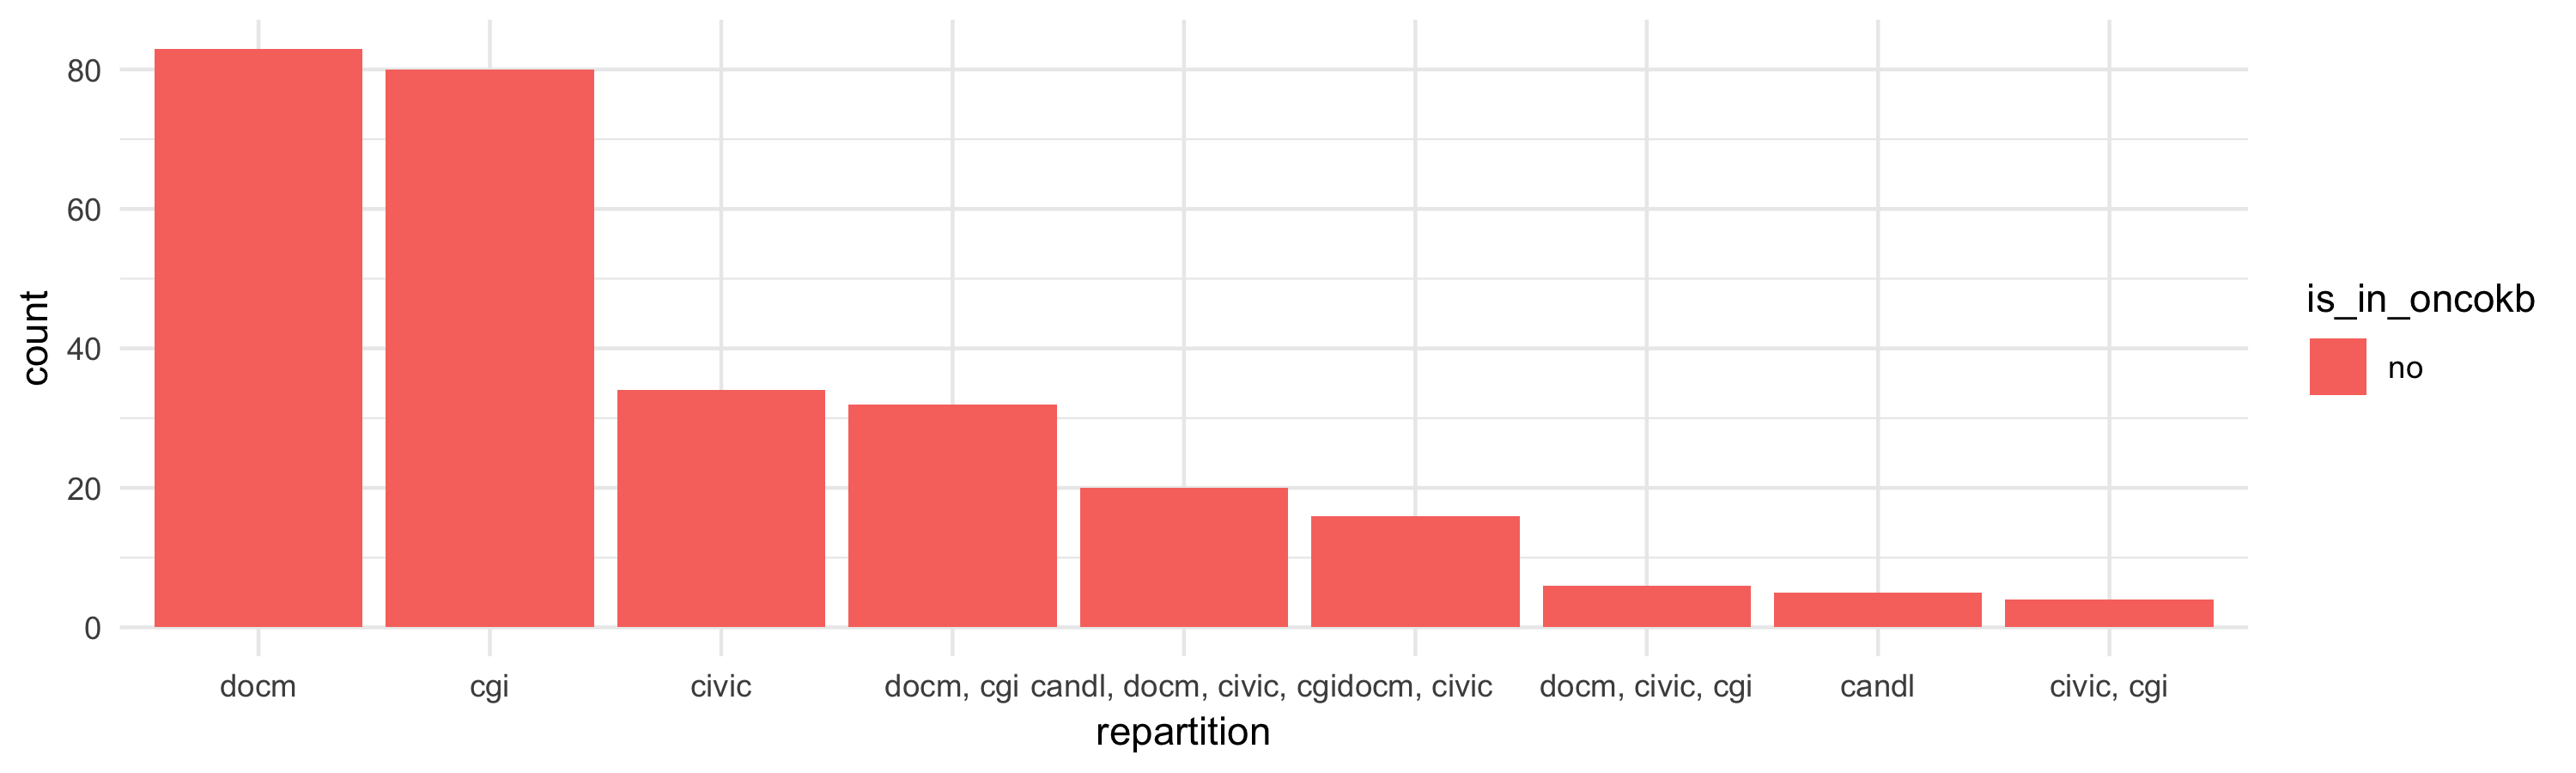

In [70]:
plot_histogram(annotated_mutations,
               "repartition", fill_name = "is_in_oncokb") + theme(axis.text.x = element_text(angle = 45, hjust = 1))

plot_histogram(annotated_mutations[annotated_mutations$is_in_oncokb == "no",],
               "repartition", fill_name = "is_in_oncokb")

### At the key level

In [71]:
annotated_mutations_key <- as.data.frame(annotated_mutations %>% group_by(mut_key) %>%
                                                                 summarise(count = length(unique(database)),
                                                                           repartition = toString(unique(database)),
                                                                           is_in_oncokb = unique(is_in_oncokb)))

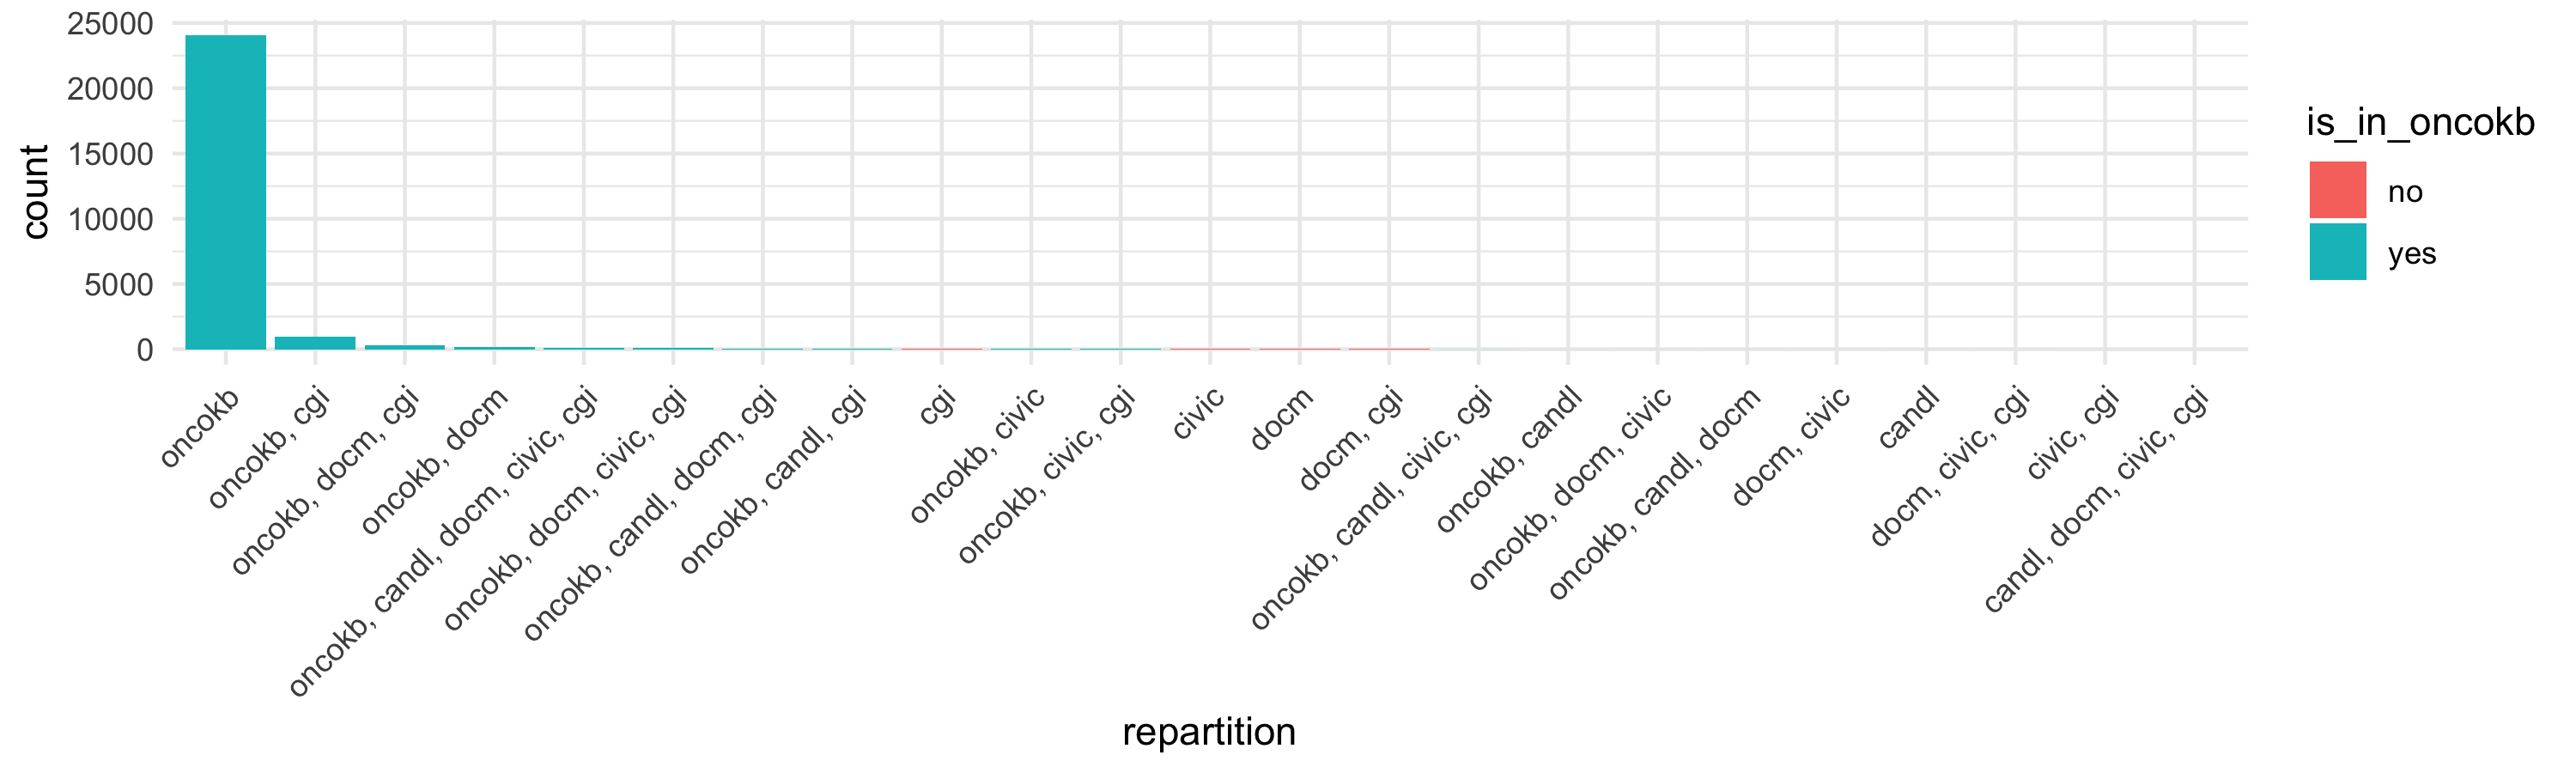

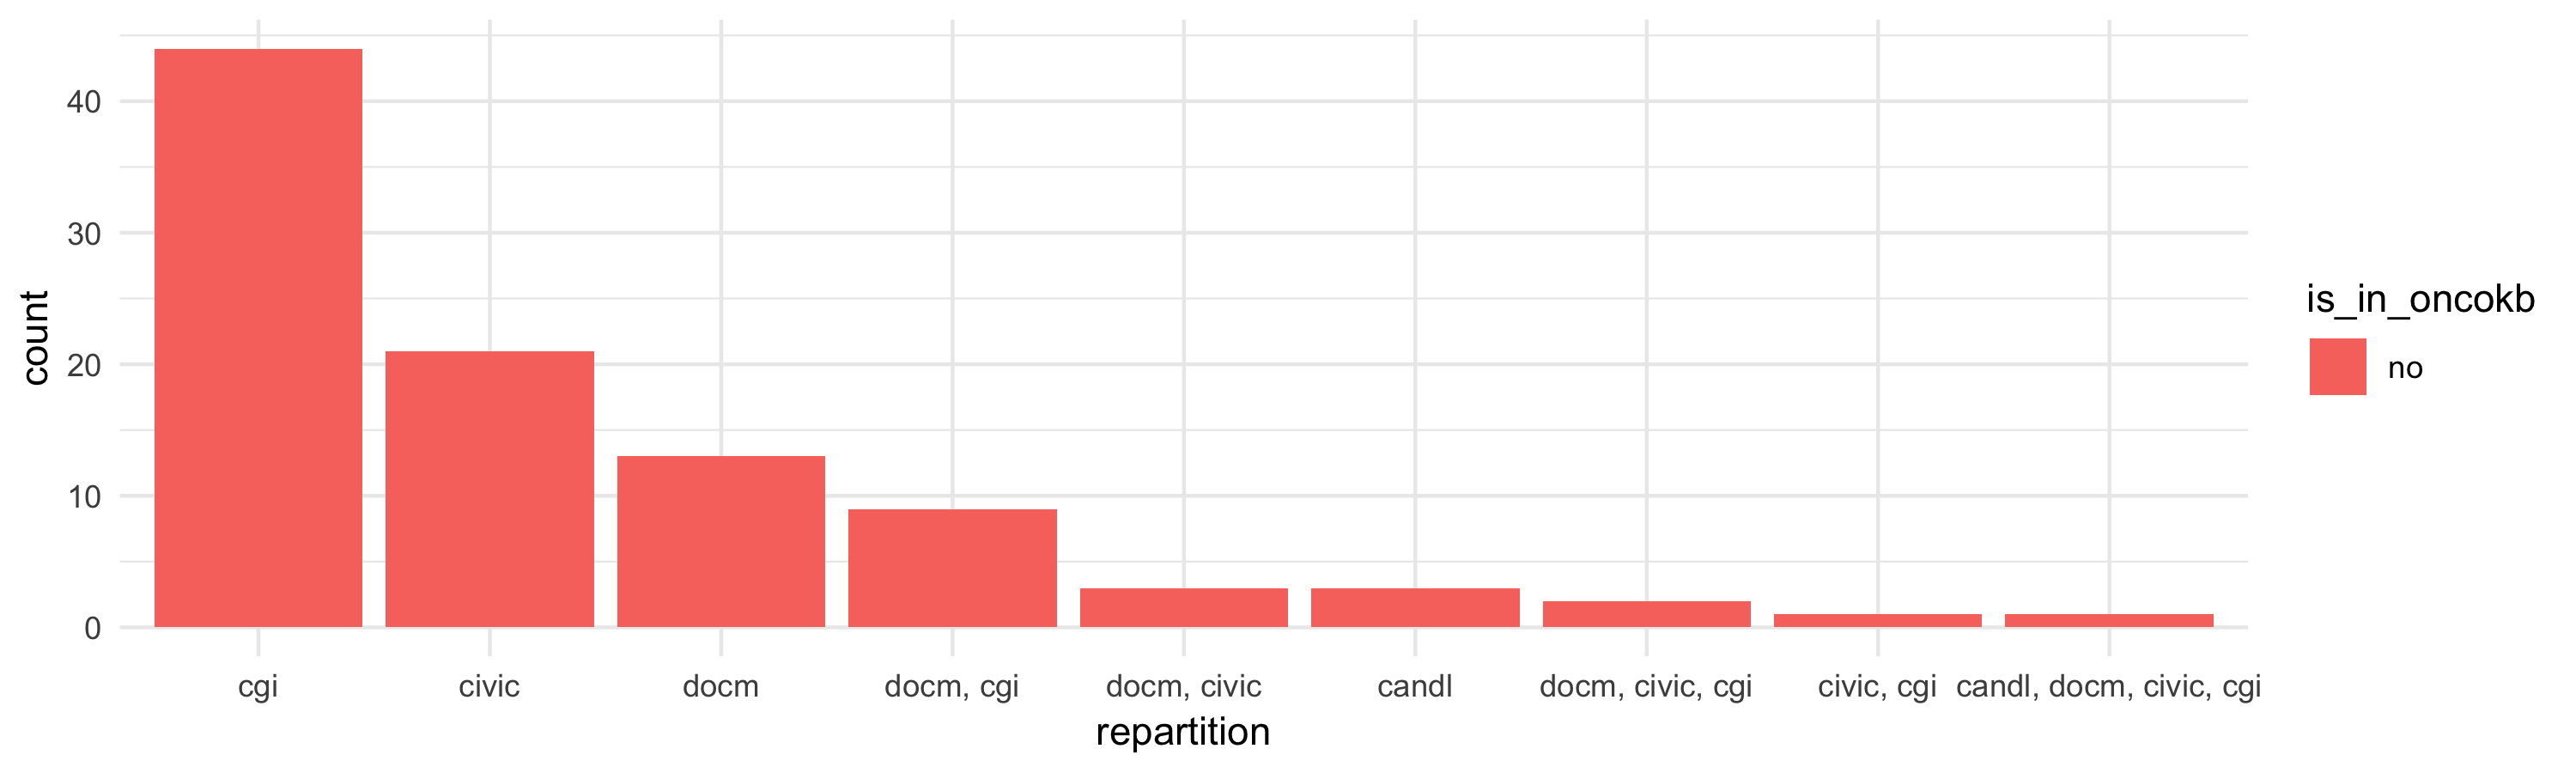

In [72]:
plot_histogram(annotated_mutations_key,
               "repartition", fill_name = "is_in_oncokb") + theme(axis.text.x = element_text(angle = 45, hjust = 1))

plot_histogram(annotated_mutations_key[annotated_mutations_key$is_in_oncokb == "no",],
               "repartition", fill_name = "is_in_oncokb")

### Mutations not in OncoKB

In [140]:
# number of rows
nrow(annotated_mutations[annotated_mutations$is_in_oncokb == "no",])

# number of distinct mutations
length(unique(annotated_mutations$mut_key[annotated_mutations$is_in_oncokb == "no"]))

[1] 280

[1] 97

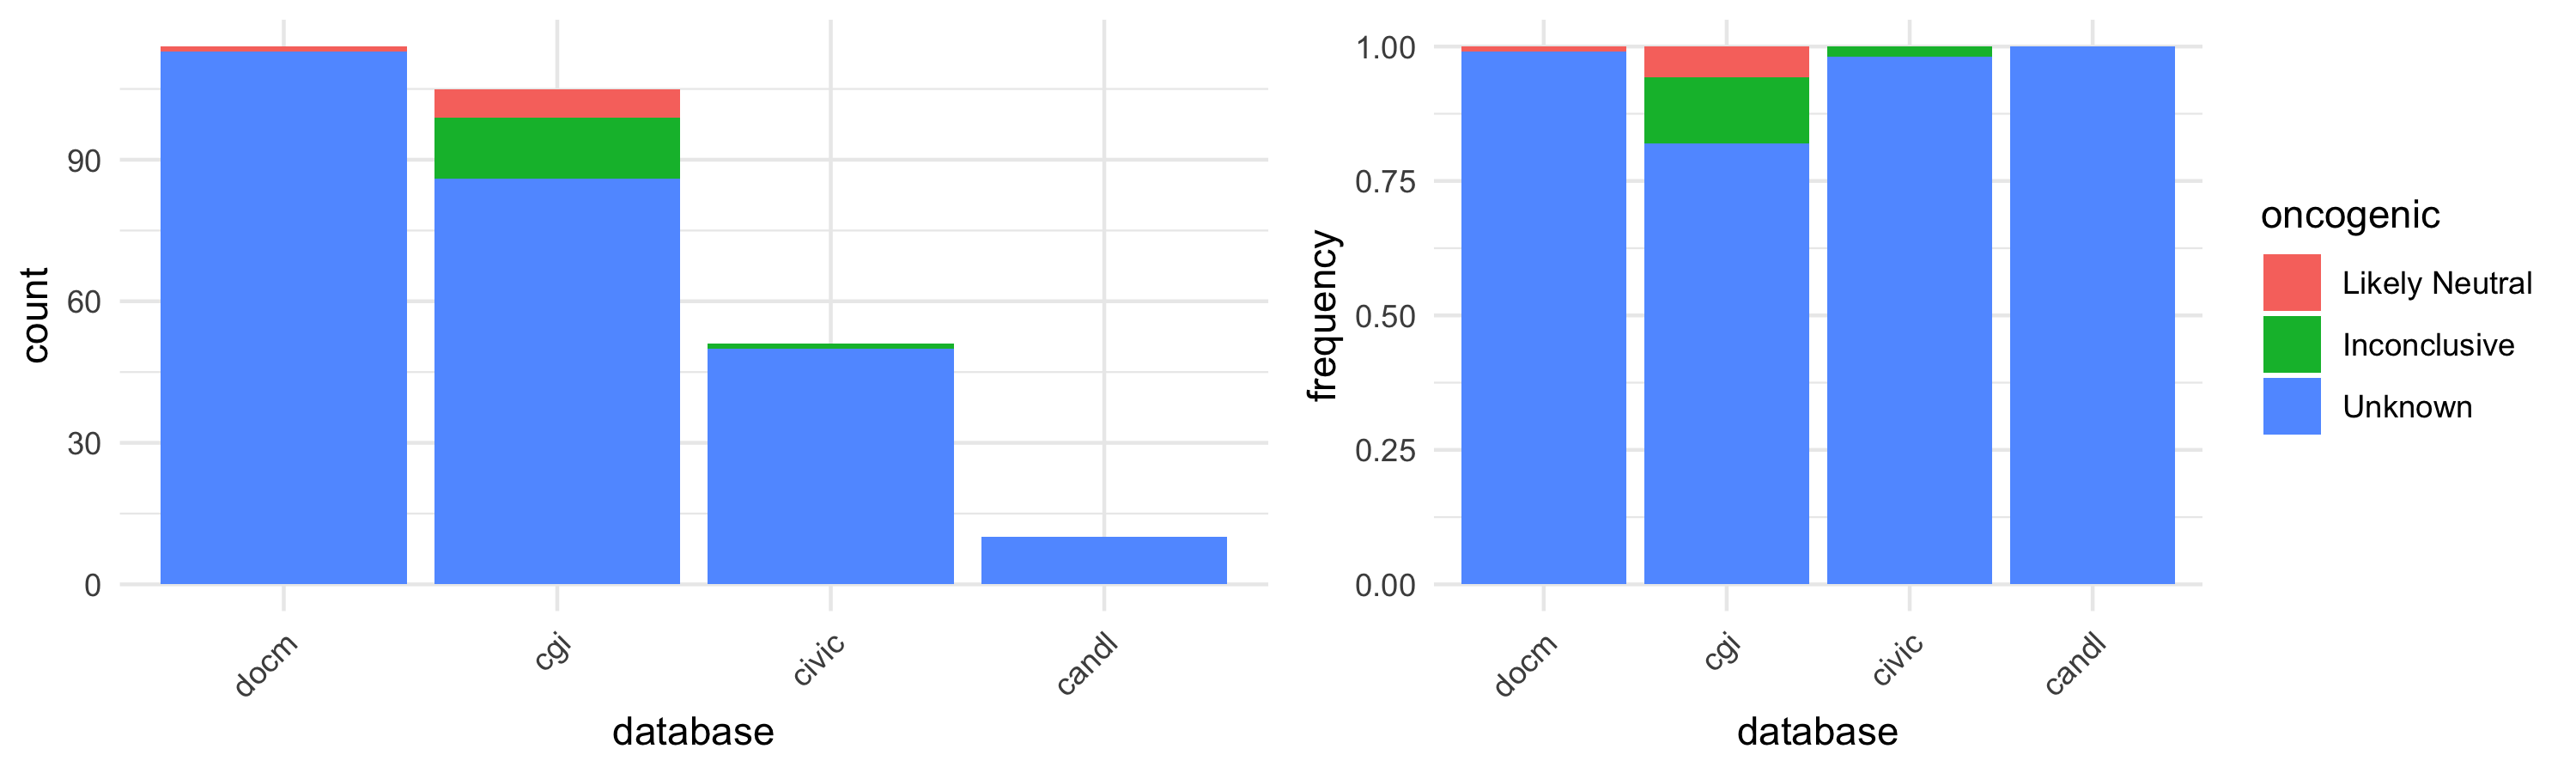

In [73]:
plot_contingency_table_as_histograms(annotated_mutations[annotated_mutations$is_in_oncokb == "no",], 
                                     "database", "oncogenic")

In [76]:
colnames = c("is_in_oncokb", "is_in_candl", "is_in_docm", "is_in_civic", "is_in_cgi")

table <- data.frame()

for (col in colnames) {
    table <- rbind(table, impact %>% filter(!! sym(col) == "yes") %>%
                                     summarise(oncokb = sum(is_in_oncokb == "yes"),
                                               candl  = sum(is_in_candl  == "yes"),
                                               docm   = sum(is_in_docm   == "yes"),
                                               civic  = sum(is_in_civic  == "yes"),
                                               cgi    = sum(is_in_cgi    == "yes")))
}

table <- as.table(as.matrix(table))
rownames(table) <- colnames(table)
table

       oncokb candl  docm civic   cgi
oncokb  64221  8866 19671 12624 23356
candl    8866  8876  8611  7817  8823
docm    19671  8611 19785 12351 18191
civic   12624  7817 12351 12675 12538
cgi     23356  8823 18191 12538 23461

In [86]:
table <- data.frame()

impact_by_key <- impact %>% group_by(mut_key) %>%
                            summarise(is_in_oncokb = unique(is_in_oncokb),
                                      is_in_candl  = unique(is_in_candl),
                                      is_in_docm   = unique(is_in_docm),
                                      is_in_civic  = unique(is_in_civic),
                                      is_in_cgi    = unique(is_in_cgi))

for (col in colnames) {
    table <- rbind(table, impact_by_key %>% filter(!! sym(col) == "yes") %>%
                                            summarise(oncokb = sum(is_in_oncokb == "yes"),
                                                      candl  = sum(is_in_candl  == "yes"),
                                                      docm   = sum(is_in_docm   == "yes"),
                                                      civic  = sum(is_in_civic  == "yes"),
                                                      cgi    = sum(is_in_cgi    == "yes")))
}

table <- as.table(as.matrix(table))
rownames(table) <- colnames(table)
table

       oncokb candl  docm civic   cgi
oncokb  25947   215   760   261  1643
candl     215   219   156    94   209
docm      760   156   788   182   570
civic     261    94   182   289   220
cgi      1643   209   570   220  1700

Why do we have so many OncoKB keys?

In [129]:
length(unique(impact$mut_key[impact$is_in_oncokb == "yes"]))
length(unique(impact$mut_key[impact$is_in_oncokb == "yes" & impact$Consequence %in% c("stopgain_SNV",
                                                                                      "frameshift_deletion",
                                                                                      "frameshift_insertion",
                                                                                      "splicing")]))

[1] 25947

[1] 21581

Most of them are truncating events.

## Study shared genes

In [104]:
oncokb <- read.table("../../../data/other_databases/allAnnotatedVariants.txt",
                     sep = "\t", stringsAsFactors = FALSE, header = TRUE, fill = TRUE)

In [105]:
oncokb_genes <- unique(oncokb$Gene)
candl_genes  <- unique(candl$Gene)
docm_genes   <- unique(docm$gene)
civic_genes  <- unique(civic$gene)
cgi_genes    <- unique(cgi$gene)

### Correct Hugo symbols

In [106]:
candl_genes[! candl_genes %in% oncokb_genes]

[1] ""            " 8528263\""  " 11726500\"" "CSF3R"       " 23816960\""
 [6] " 15118073\"" " 16187281\"" " 19718025\"" "FRK"         " 17699867\""
[11] " 18955458\"" " 23582185\"" " 19075190\"" " 20570890\"" "LNK"        
[16] "LTK"         "PAK7"        " 23970477\"" " 15928335\"" " 22745105"  
[21] " 15928335"   " 17376864\"" " 15647370\"" "PRKACA"      " 24855271"  
[26] " 25057884"   "ROCK1"       "TRRAP"       "TYK2"

|Old Hugo Symbol | New Hugo symbol | HGNC reason     |
| -------------- | --------------- | --------------- |
| PAK7           |  PAK5           | Previous symbol |
| LNK            |  SH2B3          | Synonyms        |
| 8528263"       |  -              | Unmatched       |
| 11726500"      |  -              | Unmatched       |
| 23816960"      |  -              | Unmatched       |
| 15118073"      |  -              | Unmatched       |
| 16187281"      |  -              | Unmatched       |
| 19718025"      |  -              | Unmatched       |
| 17699867"      |  -              | Unmatched       |
| 18955458"      |  -              | Unmatched       |
| 23582185"      |  -              | Unmatched       |
| 19075190"      |  -              | Unmatched       |
| 20570890"      |  -              | Unmatched       |
| 23970477"      |  -              | Unmatched       |
| 15928335"      |  -              | Unmatched       |
| 17376864"      |  -              | Unmatched       |
| 15647370"      |  -              | Unmatched       |

In [107]:
old_Hugo_Symbol = c('PAK7', 'LNK', '8528263\"', '11726500\"', '23816960\"', '15118073\"', '16187281\"', '19718025\"',
                    '17699867\"', '18955458\"', '23582185\"', '19075190\"', '20570890\"', '23970477\"', '15928335\"',
                    '17376864\"', '15647370\"')
new_Hugo_Symbol = c('PAK5', 'SH2B3', '-','-','-','-','-','-','-','-','-','-','-','-','-','-','-')

old_symbols <- which(candl_genes %in% old_Hugo_Symbol)
candl_genes[old_symbols] <- new_Hugo_Symbol[match(candl_genes[old_symbols], old_Hugo_Symbol)]

In [108]:
head(docm_genes[! docm_genes %in% oncokb_genes])

[1] "MTHFR"  "EPHA2"  "EPHB2"  "CSF3R"  "FCGR2A" "FCGR3A"

Every symbol approved.

In [111]:
head(civic_genes[! civic_genes %in% oncokb_genes])

[1] "NT5C2" "XRCC1" "ERCC5" "MTHFR" "GSTP1" "ABCG2"

Every symbol approved.

In [112]:
cgi_genes[! cgi_genes %in% oncokb_genes]

[1] "ABCB4"       "ARHGAP26"    "BAX"         "C15orf23"    "CASP10"     
 [6] "CRBN"        "CSF1R"       "CSF3R"       "DCC"         "DLC1"       
[11] "EIF2C2"      "EPHA2"       "EPHB2"       "FAM175A"     "FAS"        
[16] "FLCN"        "GATA1"       "GATA2"       "GJB2"        "GNAI2"      
[21] "GPC3"        "HERC2"       "IGF2R"       "ING1"        "IRF1"       
[26] "JAGN1"       "KCNJ5"       "KDM5C,KDM5C" "KLF6"        "LZTS1"      
[31] "MAD1L1"      "MCC"         "MLH3"        "MLL3"        "MRE11A"     
[36] "MUTYH"       "OGG1"        "OPCML"       "PDGFRL"      "PPARG"      
[41] "PRKAR1A"     "PTPN12"      "PTPRJ"       "RAD54B"      "RBBP8"      
[46] "RECQL4"      "RNF6"        "SDHA"        "SDHAF2"      "SDHD"       
[51] "SLC22A18"    "TMEM127"     "WRN"         "WT1"         "WWOX"       
[56] "XPC"

|Old Hugo Symbol | New Hugo symbol | HGNC reason     |
| -------------- | --------------- | --------------- |
| C15orf23       |  KNSTRN         | Previous symbol |
| EIF2C2         |  AGO2           | Previous symbol |
| FAM175A        |  ABRAXAS1       | Previous symbol |
| MLL3           |  KMT2C          | Previous symbol |
| MRE11A         |  MRE11          | Previous symbol |

In [113]:
old_Hugo_Symbol = c('C15orf23', 'EIF2C2', 'FAM175A', 'MLL3', 'MRE11A')
new_Hugo_Symbol = c('KNSTRN', 'AGO2', 'ABRAXAS1', 'KMT2C', 'MRE11')

old_symbols <- which(cgi_genes %in% old_Hugo_Symbol)
cgi_genes[old_symbols] <- new_Hugo_Symbol[match(cgi_genes[old_symbols], old_Hugo_Symbol)]

### Study genes sharing

In [114]:
oncokb_genes <- as.data.frame(unique(oncokb$Gene))
candl_genes  <- as.data.frame(unique(candl$Gene))
docm_genes   <- as.data.frame(unique(docm$gene))
civic_genes  <- as.data.frame(unique(civic$gene))
cgi_genes    <- as.data.frame(unique(cgi$gene))

colnames(oncokb_genes) <- "gene"
colnames(candl_genes)  <- "gene"
colnames(docm_genes)  <- "gene"
colnames(civic_genes)  <- "gene"
colnames(cgi_genes)    <- "gene"

oncokb_genes$database <- "oncokb"
candl_genes$database  <- "candl"
docm_genes$database   <- "docm"
civic_genes$database  <- "civic"
cgi_genes$database    <- "cgi"

annotated_genes <- rbind(oncokb_genes, candl_genes, docm_genes, civic_genes, cgi_genes)

In [115]:
annotated_genes <- as.data.frame(annotated_genes %>% group_by(gene) %>%
                                                     summarise(count = length(unique(database)),
                                                               repartition = toString(unique(database)),
                                                               in_onco_kb = grepl("oncokb", repartition)))

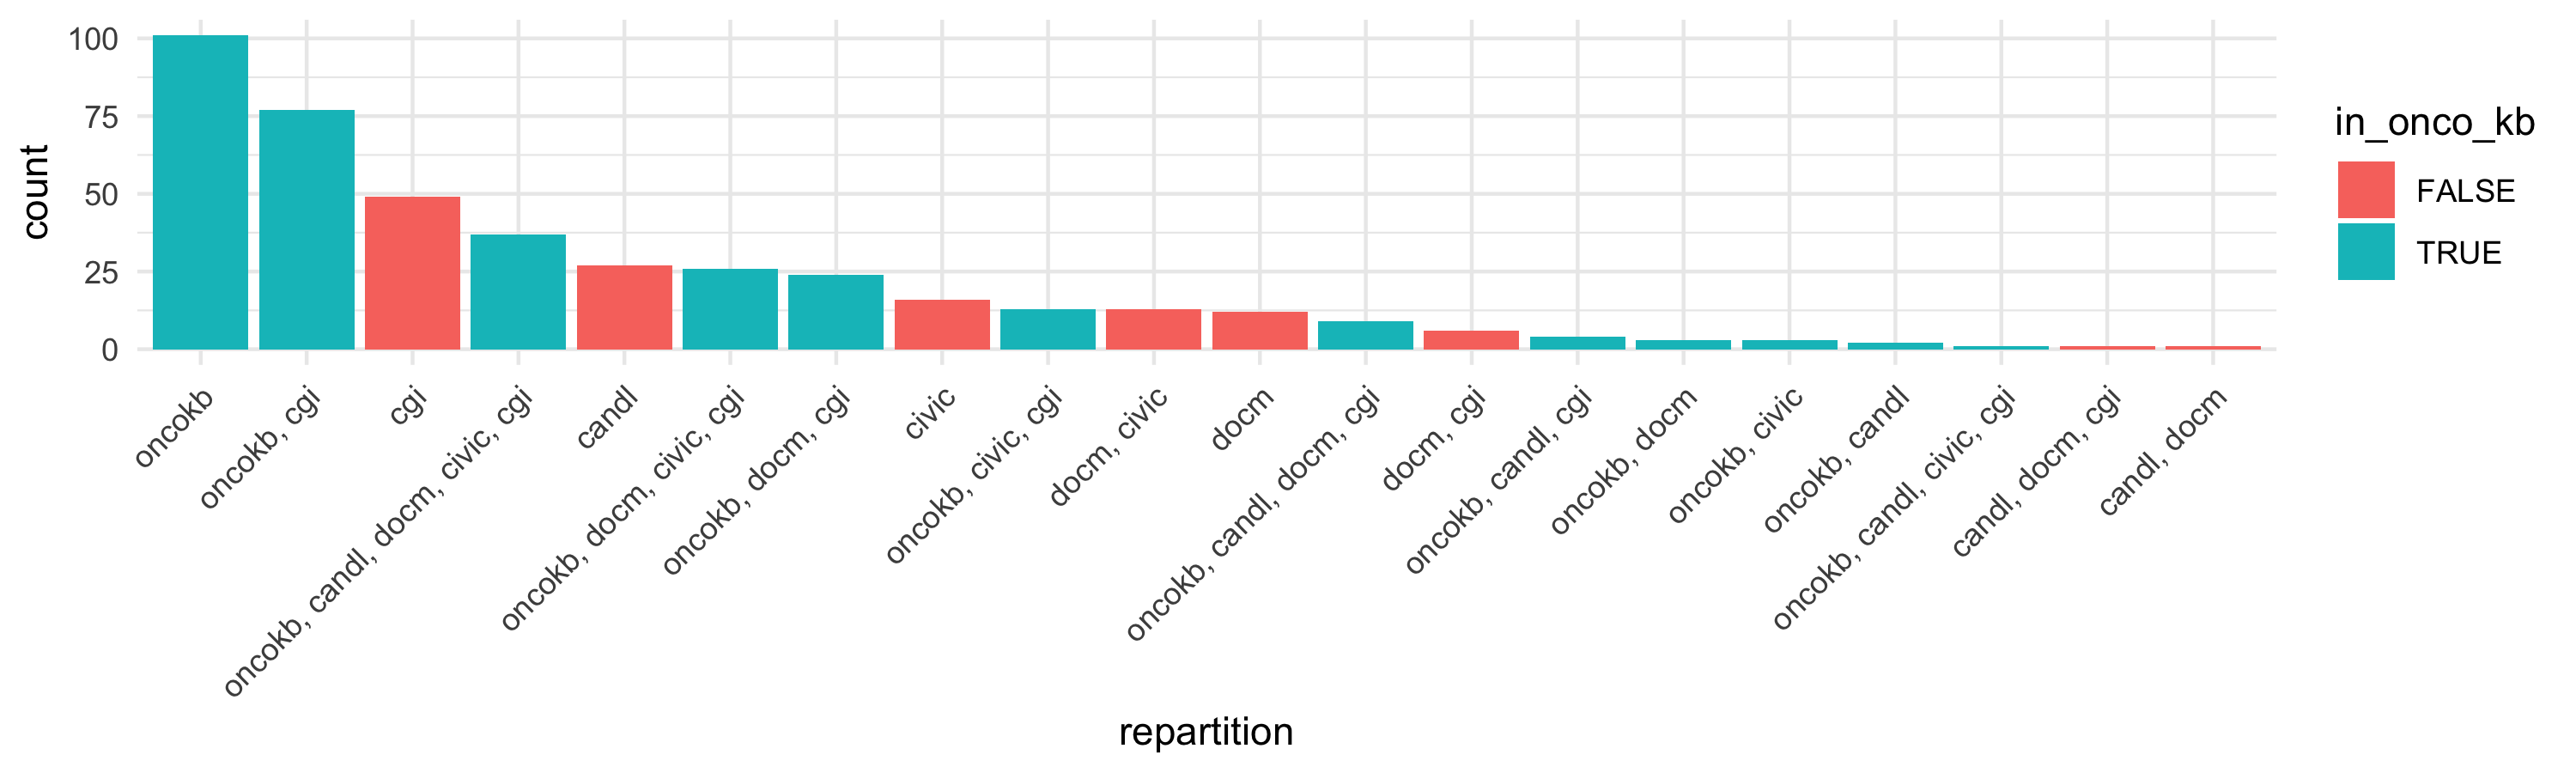

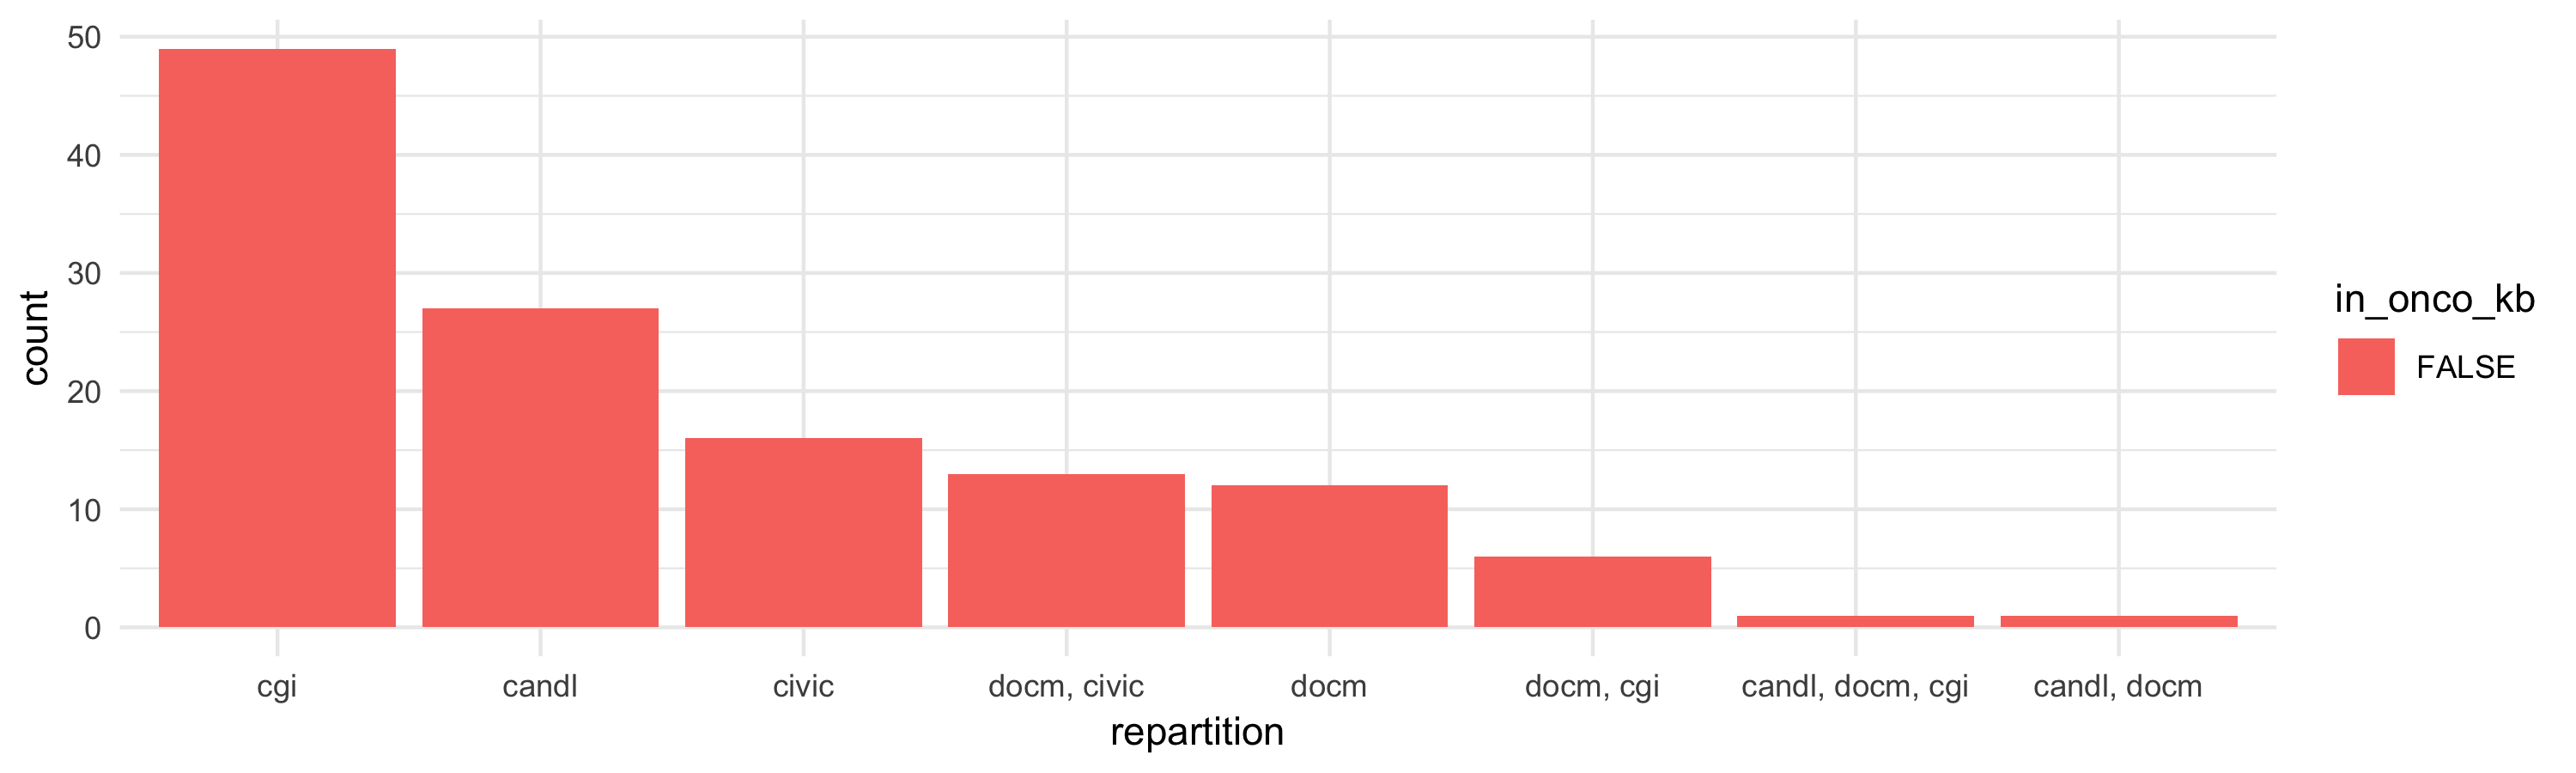

In [117]:
plot_histogram(annotated_genes,
               "repartition", fill = "in_onco_kb") + theme(axis.text.x = element_text(angle = 45, hjust = 1))
plot_histogram(annotated_genes[! annotated_genes$in_onco_kb,],
               "repartition", fill = "in_onco_kb")

In [118]:
as.character(annotated_genes$gene[annotated_genes$count == 5])

table(annotated_genes$repartition[annotated_genes$count == 4])
as.character(annotated_genes$gene[annotated_genes$count == 4])

table(annotated_genes$repartition[annotated_genes$count == 3])
as.character(annotated_genes$gene[annotated_genes$count == 3])

table(annotated_genes$repartition[annotated_genes$count == 2])
as.character(annotated_genes$gene[annotated_genes$count == 2])

[1] "ABL1"   "AKT1"   "ALK"    "ARAF"   "BRAF"   "BTK"    "CDK4"   "DDR2"  
 [9] "EGFR"   "ERBB2"  "ERBB3"  "ERBB4"  "ESR1"   "FGFR2"  "FGFR3"  "FLT3"  
[17] "GNAQ"   "GNAS"   "IDH1"   "IDH2"   "JAK1"   "JAK2"   "JAK3"   "KDR"   
[25] "KIT"    "KRAS"   "MAP2K1" "MAP2K2" "MET"    "MTOR"   "MYD88"  "NRAS"  
[33] "PDGFRA" "PIK3CA" "RAC1"   "RET"    "SMO"


oncokb, candl, civic, cgi  oncokb, candl, docm, cgi  oncokb, docm, civic, cgi 
                        1                         9                        26 

[1] "AKT3"   "AR"     "ATM"    "B2M"    "BRCA1"  "CDKN2A" "CHEK2"  "CTNNB1"
 [9] "DNMT3A" "ERCC2"  "EZH2"   "FGFR1"  "FGFR4"  "FOXL2"  "GNA11"  "HRAS"  
[17] "IL7R"   "MAPK1"  "MLH1"   "MYC"    "NOTCH1" "NPM1"   "PIK3R1" "PTEN"  
[25] "PTPN11" "RAF1"   "RB1"    "RHOA"   "ROS1"   "RUNX1"  "SF3B1"  "STK11" 
[33] "TP53"   "TSC2"   "U2AF1"  "VHL"


  candl, docm, cgi oncokb, candl, cgi oncokb, civic, cgi  oncokb, docm, cgi 
                 1                  4                 13                 24 

[1] "ACVR1"   "AKT2"    "APC"     "BRCA2"   "CARD11"  "CBL"     "CCND3"  
 [8] "CREBBP"  "CRLF2"   "EP300"   "ETV6"    "FANCA"   "FBXW7"   "H3F3A"  
[15] "MED12"   "MEN1"    "MPL"     "MSH2"    "MSH6"    "MYCN"    "NF2"    
[22] "NFE2L2"  "NTRK3"   "PIK3R2"  "PLCG2"   "PMS2"    "POLE"    "PPP2R1A"
[29] "PPP6C"   "PTPRD"   "RAD51D"  "RHEB"    "RIT1"    "SMAD4"   "SOS1"   
[36] "SPOP"    "SRC"     "STAT3"   "TERT"    "TSC1"    "XPO1"    "CSF3R"


  candl, docm     docm, cgi   docm, civic oncokb, candl   oncokb, cgi 
            1             6            13             2            77 
oncokb, civic  oncokb, docm 
            3             3 

[1] "ATR"      "AURKA"    "AXIN2"    "BAP1"     "BARD1"    "BCL10"   
  [7] "BCL2"     "BLM"      "BMPR1A"   "BRIP1"    "CASP8"    "CCND1"   
 [13] "CDC73"    "CDH1"     "CDK12"    "CDK6"     "CDKN1B"   "CDKN2B"  
 [19] "CEBPA"    "CTCF"     "CTLA4"    "CYSLTR2"  "DICER1"   "DIS3"    
 [25] "ELF3"     "EPAS1"    "ERCC3"    "ERCC4"    "ERRFI1"   "FANCC"   
 [31] "FAT1"     "FH"       "FOXA1"    "FOXO1"    "FOXP1"    "GLI1"    
 [37] "HIST1H1C" "HNF1A"    "IGF1R"    "KDM5C"    "KEAP1"    "KLF4"    
 [43] "KNSTRN"   "MAP2K4"   "MAX"      "MDM2"     "MDM4"     "MEF2B"   
 [49] "MITF"     "MYOD1"    "NBN"      "NF1"      "NTRK1"    "NUP93"   
 [55] "PALB2"    "PDGFRB"   "PIK3CB"   "PIK3CD"   "PIM1"     "PMS1"    
 [61] "PTCH1"    "PTPRT"    "RAB35"    "RAD50"    "RAD51C"   "RAD54L"  
 [67] "RASA1"    "RRAS2"    "RXRA"     "SDHB"     "SDHC"     "SETD2"   
 [73] "SHOC2"    "SMAD2"    "SMAD3"    "SMARCA4"  "SOX9"     "SRSF2"   
 [79] "STAT5B"   "TCF3"     "TET2"     "TGFBR1"   "TGFBR2"   "WHSC1"   
 [85] "XRCC2"    "ROCK1"    "ABCB1"    "ABCG2"    "CSF1R"    "EPHA2"   
 [91] "EPHB2"    "ETS2"     "FCGR2A"   "FCGR3A"   "GATA2"    "GSTP1"   
 [97] "HERC2"    "MGMT"     "MTHFR"    "NQO1"     "NT5C2"    "PML"     
[103] "SETBP1"   "WT1"      "XRCC1"